In [ ]:
import tensorflow as tf

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM, Dropout
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
!pip install pmdarima

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

from math import floor,ceil,sqrt
import sys
import warnings
import datetime as dt

if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.linear_model import LinearRegression
from pmdarima.arima import auto_arima
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving historical_data_GAZP3.csv to historical_data_GAZP3 (1).csv


In [ ]:
import io

df = pd.read_csv(io.BytesIO(uploaded['historical_data_GAZP3 (!).csv']))
print(df)

KeyError: 'historical_data_GAZP3 (!).csv'

In [ ]:
print(df.shape, df.columns)

(4562, 9) Index(['open', 'close', 'high', 'low', 'value', 'volume', 'end', 'date',
       'time'],
      dtype='object')


In [ ]:
df

,open,close,high,low,value,volume,end,date,time
time,,,,,,,,,
01/23/2006 23:59:59,239.50,218.89,239.50,218.49,1.130995e+09,5120765,2006-01-23 23:59:59,2006-01-23,01/23/2006 23:59:59
01/24/2006 23:59:59,221.00,224.00,224.68,219.66,1.991942e+09,8983192,2006-01-24 23:59:59,2006-01-24,01/24/2006 23:59:59
01/25/2006 23:59:59,225.50,228.38,231.00,225.00,3.534137e+09,15480374,2006-01-25 23:59:59,2006-01-25,01/25/2006 23:59:59
01/26/2006 23:59:59,228.20,224.47,229.41,223.51,1.721376e+09,7588759,2006-01-26 23:59:59,2006-01-26,01/26/2006 23:59:59
01/27/2006 23:59:59,225.75,228.75,231.50,224.00,2.901323e+09,12729718,2006-01-27 23:59:59,2006-01-27,01/27/2006 23:59:59
...,...,...,...,...,...,...,...,...,...
04/08/2024 23:59:59,164.00,163.89,164.90,163.57,2.709310e+09,16501080,2024-04-08 23:59:59,2024-04-08,04/08/2024 23:59:59
04/09/2024 23:59:59,164.00,164.08,165.79,163.49,4.787296e+09,29074240,2024-04-09 23:59:59,2024-04-09,04/09/2024 23:59:59
04/10/2024 23:59:59,164.10,164.74,165.94,163.59,3.831243e+09,23220690,2024-04-10 23:59:59,2024-04-10,04/10/2024 23:59:59


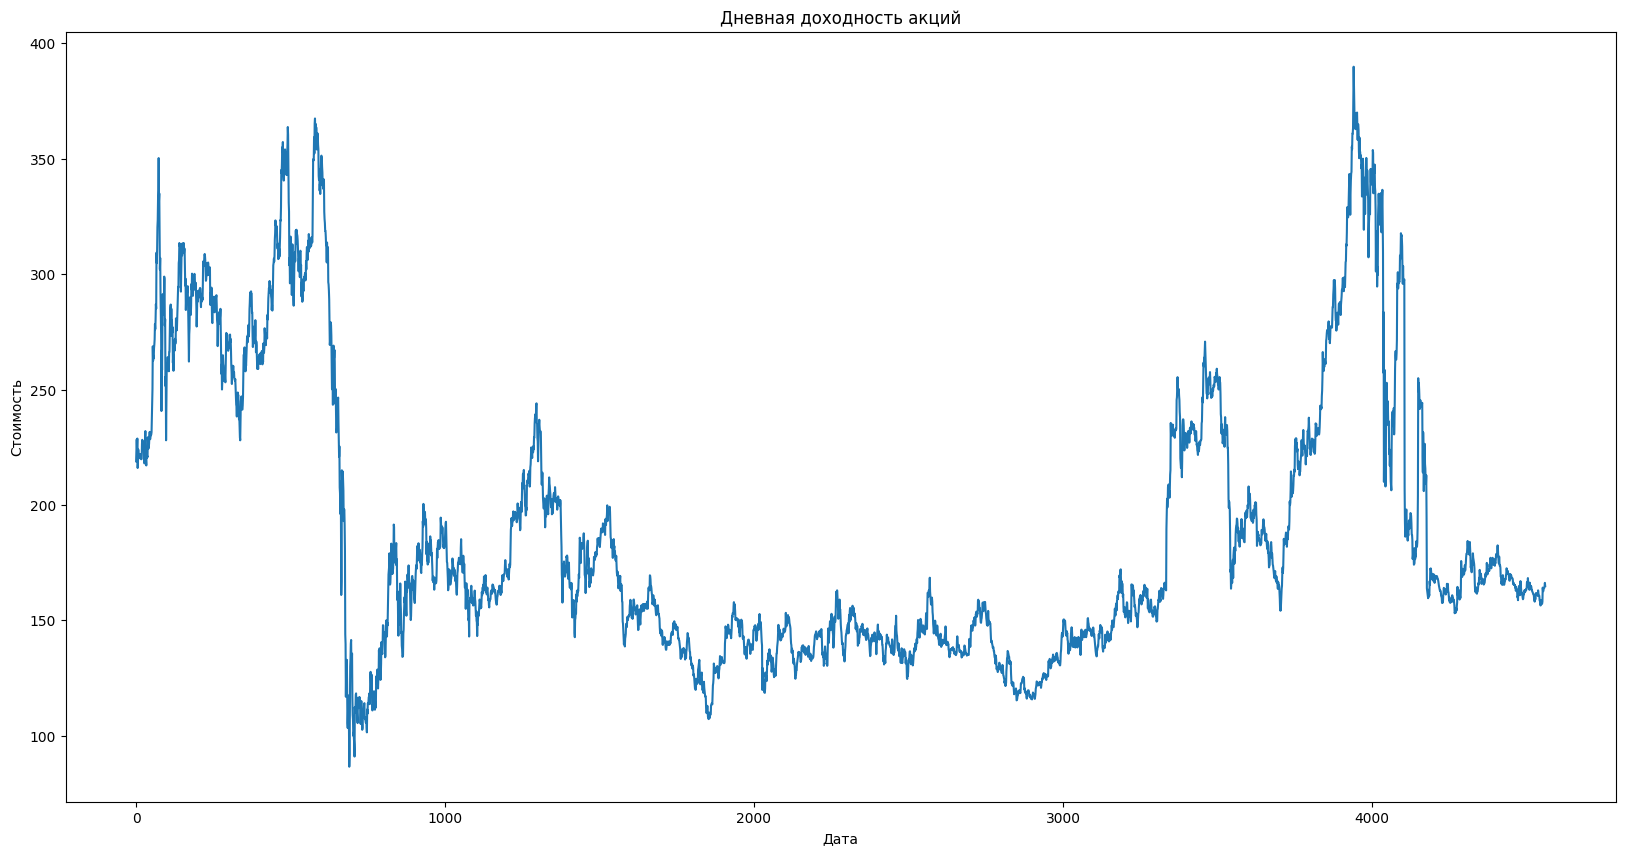

In [ ]:
plt.plot(list(df['close']))
plt.xlabel('Дата')
plt.ylabel('Стоимость')
plt.title('Дневная доходность акций')
#plt.grid(True)
plt.show()

In [ ]:
df['time'] = pd.to_datetime(df['begin'])
df['date'] = df['time'].dt.strftime('%Y-%m-%d')

KeyError: 'begin'

In [ ]:
df

,open,close,high,low,value,volume,end,date,time
time,,,,,,,,,
01/23/2006 23:59:59,239.50,218.89,239.50,218.49,1.130995e+09,5120765,2006-01-23 23:59:59,2006-01-23,01/23/2006 23:59:59
01/24/2006 23:59:59,221.00,224.00,224.68,219.66,1.991942e+09,8983192,2006-01-24 23:59:59,2006-01-24,01/24/2006 23:59:59
01/25/2006 23:59:59,225.50,228.38,231.00,225.00,3.534137e+09,15480374,2006-01-25 23:59:59,2006-01-25,01/25/2006 23:59:59
01/26/2006 23:59:59,228.20,224.47,229.41,223.51,1.721376e+09,7588759,2006-01-26 23:59:59,2006-01-26,01/26/2006 23:59:59
01/27/2006 23:59:59,225.75,228.75,231.50,224.00,2.901323e+09,12729718,2006-01-27 23:59:59,2006-01-27,01/27/2006 23:59:59
...,...,...,...,...,...,...,...,...,...
04/08/2024 23:59:59,164.00,163.89,164.90,163.57,2.709310e+09,16501080,2024-04-08 23:59:59,2024-04-08,04/08/2024 23:59:59
04/09/2024 23:59:59,164.00,164.08,165.79,163.49,4.787296e+09,29074240,2024-04-09 23:59:59,2024-04-09,04/09/2024 23:59:59
04/10/2024 23:59:59,164.10,164.74,165.94,163.59,3.831243e+09,23220690,2024-04-10 23:59:59,2024-04-10,04/10/2024 23:59:59


In [ ]:
df = df.drop('time',axis=1)
df = df.drop('begin',axis=1)

KeyError: "['time'] not found in axis"

In [ ]:
df

,open,close,high,low,value,volume,end,date
time,,,,,,,,
01/23/2006 23:59:59,239.50,218.89,239.50,218.49,1.130995e+09,5120765,2006-01-23 23:59:59,2006-01-23
01/24/2006 23:59:59,221.00,224.00,224.68,219.66,1.991942e+09,8983192,2006-01-24 23:59:59,2006-01-24
01/25/2006 23:59:59,225.50,228.38,231.00,225.00,3.534137e+09,15480374,2006-01-25 23:59:59,2006-01-25
01/26/2006 23:59:59,228.20,224.47,229.41,223.51,1.721376e+09,7588759,2006-01-26 23:59:59,2006-01-26
01/27/2006 23:59:59,225.75,228.75,231.50,224.00,2.901323e+09,12729718,2006-01-27 23:59:59,2006-01-27
...,...,...,...,...,...,...,...,...
04/08/2024 23:59:59,164.00,163.89,164.90,163.57,2.709310e+09,16501080,2024-04-08 23:59:59,2024-04-08
04/09/2024 23:59:59,164.00,164.08,165.79,163.49,4.787296e+09,29074240,2024-04-09 23:59:59,2024-04-09
04/10/2024 23:59:59,164.10,164.74,165.94,163.59,3.831243e+09,23220690,2024-04-10 23:59:59,2024-04-10


In [ ]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 4562 entries, 01/23/2006 23:59:59 to 04/12/2024 23:59:59
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    4562 non-null   float64
 1   close   4562 non-null   float64
 2   high    4562 non-null   float64
 3   low     4562 non-null   float64
 4   value   4562 non-null   float64
 5   volume  4562 non-null   int64  
 6   end     4562 non-null   object 
 7   date    4562 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 320.8+ KB


,open,close,high,low,value,volume
count,4562.000000,4562.000000,4562.000000,4562.000000,4.562000e+03,4.562000e+03
mean,188.466861,188.350962,190.824042,185.803477,9.183805e+09,4.670786e+07
std,61.007552,60.938687,61.833068,59.957766,7.826177e+09,3.111240e+07
min,88.000000,86.600000,94.370000,84.000000,2.274217e+08,0.000000e+00
25%,143.700000,143.795000,145.277500,142.102500,4.016927e+09,2.556152e+07
50%,165.330000,165.385000,167.200000,163.255000,6.917096e+09,3.861566e+07
75%,225.500000,225.395000,228.415000,222.157500,1.189308e+10,6.009251e+07
max,395.000000,389.820000,397.640000,378.020000,1.170773e+11,4.140240e+08


In [ ]:
print(df.columns)


Index(['open', 'close', 'high', 'low', 'value', 'volume', 'end', 'date'], dtype='object')


In [ ]:
# Extracting the closing prices of each day
fullData = df[['close']].values
print(fullData[0:5])

# Feature Scaling for fast training of neural networks
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choosing between Standardization or normalization
#sc = StandardScaler()
sc=MinMaxScaler()

dataScaler = sc.fit(fullData)
X=dataScaler.transform(fullData)
#X=FullData

print('### After Normalization ###')
X[0:5]

[[218.89]
 [224.  ]
 [228.38]
 [224.47]
 [228.75]]
### After Normalization ###


array([[0.43628389],
       [0.45313634],
       [0.46758129],
       [0.45468637],
       [0.46880153]])

In [ ]:
# split into samples
X_samples = list()
y_samples = list()

NumerOfRows = len(X)
TimeSteps=10  # next day's Price Prediction is based on last how many past day's prices

# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('\n#### Input Data shape ####')
print(X_data.shape)

# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
print('\n#### Output Data shape ####')
print(y_data.shape)


#### Input Data shape ####
(4552, 10, 1)

#### Output Data shape ####
(4552, 1)


In [ ]:
TestingRecords= 1140

X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]

print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)
print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(3412, 10, 1)
(3412, 1)

#### Testing Data shape ####
(1140, 10, 1)
(1140, 1)


In [ ]:

# Visualizing the input and output being sent to the LSTM model
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp,'--', out)

[[0.43628389]
 [0.45313634]
 [0.46758129]
 [0.45468637]
 [0.46880153]
 [0.42675285]
 [0.43671262]
 [0.45310336]
 [0.4448915 ]
 [0.44327551]] -- [0.44142867]
[[0.45313634]
 [0.46758129]
 [0.45468637]
 [0.46880153]
 [0.42675285]
 [0.43671262]
 [0.45310336]
 [0.4448915 ]
 [0.44327551]
 [0.44142867]] -- [0.44159356]


In [ ]:
# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 10
Number of Features: 1


In [ ]:
def moving_avg_prediction(df):
    shape=df.shape[0]
    df_new=df[['close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('-----------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY MOVING AVERAGE--------')
    print('-----------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    preds = []
    for i in range(0,valid_set.shape[0]):
        a = train_set['close'][len(train_set)-valid_set.shape[0]+i:].sum() + sum(preds)
        b = a/(valid_set.shape[0])
        preds.append(b)
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['close'])-preds),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['close'])
    plt.plot(valid_set[['close', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Moving Averages',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

-----------------------------------------------------------
-----------STOCK PRICE PREDICTION BY MOVING AVERAGE--------
-----------------------------------------------------------
Shape of Training Set (3422, 1)
Shape of Validation Set (1140, 1)
RMSE value on validation set: 86.41834661123113
-----------------------------------------------------------
-----------------------------------------------------------


<ipython-input-25-a0efb3ace87e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_set['Predictions'] = preds


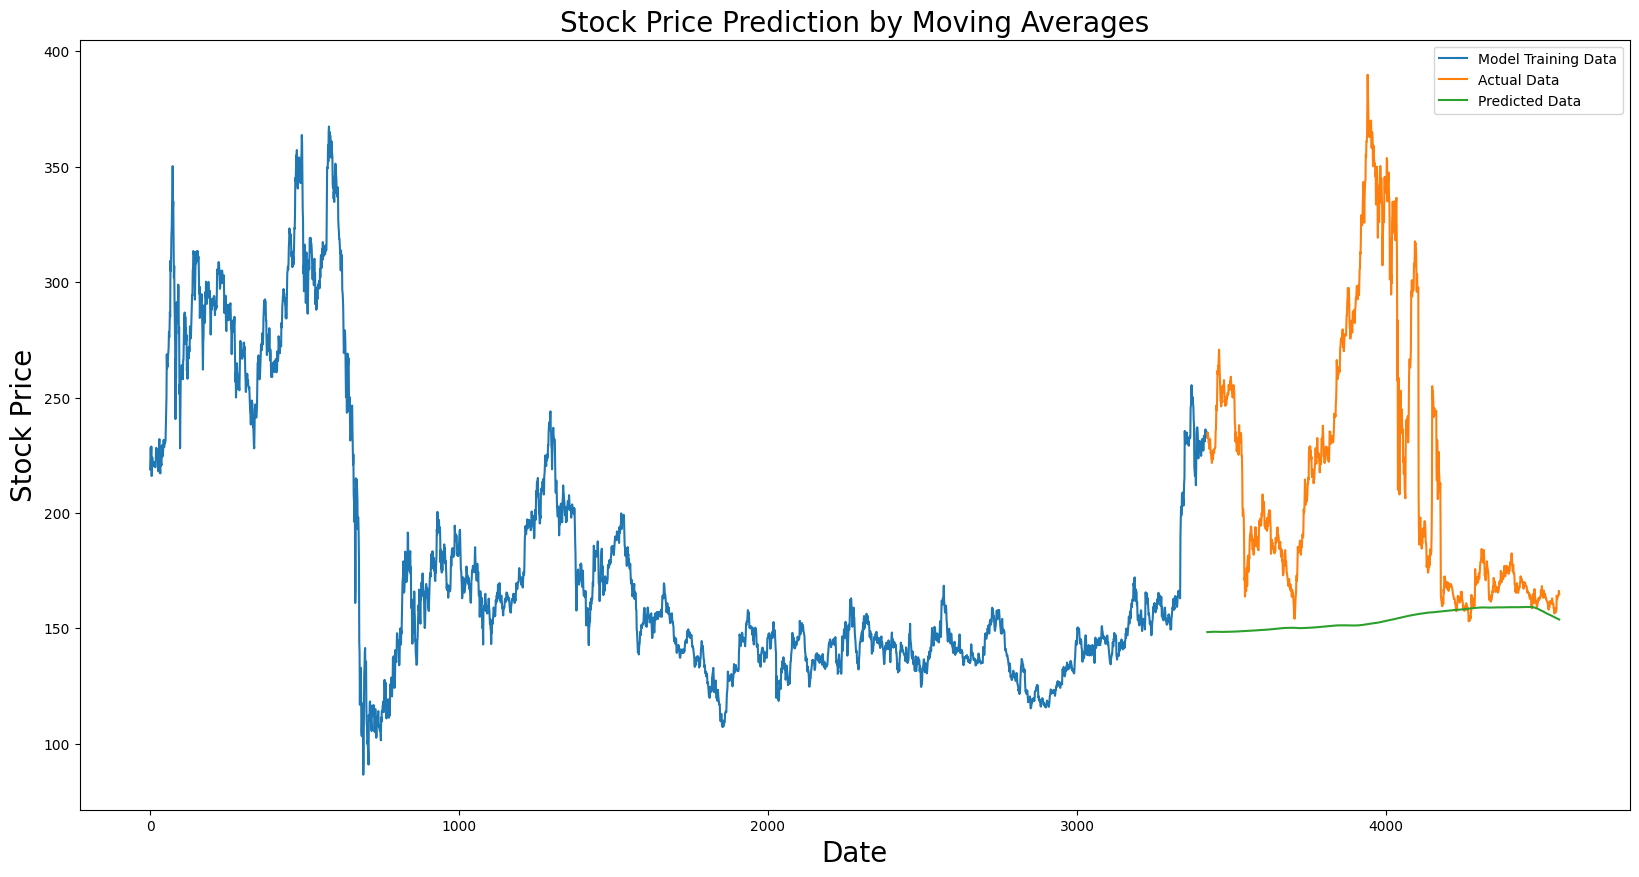

In [ ]:
moving_avg_prediction(df)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def moving_avg_prediction(df):
    shape = df.shape[0]
    df_new = df[['close']]
    df_new.head()
    train_set = df_new.iloc[:ceil(shape*0.75)]
    valid_set = df_new.iloc[ceil(shape*0.75):]
    print('-----------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY MOVING AVERAGE--------')
    print('-----------------------------------------------------------')
    print('Shape of Training Set', train_set.shape)
    print('Shape of Validation Set', valid_set.shape)
    preds = []
    for i in range(0, valid_set.shape[0]):
        a = train_set['close'][len(train_set)-valid_set.shape[0]+i:].sum() + sum(preds)
        b = a/(valid_set.shape[0])
        preds.append(b)

    # Расчет RMSE
    rmse = np.sqrt(np.mean(np.power((np.array(valid_set['close'])-preds), 2)))
    print('Root Mean Squared Error (RMSE) on validation set:', rmse)

    # Расчет среднеквадратичной ошибки (MSE)
    mse = mean_squared_error(valid_set['close'].values, preds)
    print('Mean Squared Error (MSE) on validation set:', mse)

    # Расчет средней абсолютной ошибки (MAE)
    mae = mean_absolute_error(valid_set['close'].values, preds)
    print('Mean Absolute Error (MAE) on validation set:', mae)

    # Расчет средней абсолютной процентной ошибки (MAPE)
    mape = np.mean(np.abs((valid_set['close'].values - preds) / valid_set['close'].values)) * 100
    print('Mean Absolute Percentage Error (MAPE) on validation set:', mape)

    # Расчет R-квадрат (R^2)
    r2 = r2_score(valid_set['close'].values, preds)
    print('R-squared (R^2) score on validation set:', r2)

    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['close'])
    plt.plot(valid_set[['close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Moving Averages', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])


-----------------------------------------------------------
-----------STOCK PRICE PREDICTION BY MOVING AVERAGE--------
-----------------------------------------------------------
Shape of Training Set (3422, 1)
Shape of Validation Set (1140, 1)
Root Mean Squared Error (RMSE) on validation set: 86.41834661123113
Mean Squared Error (MSE) on validation set: 7468.130631018884
Mean Absolute Error (MAE) on validation set: 62.88420551281515
Mean Absolute Percentage Error (MAPE) on validation set: 24.432685954077563
R-squared (R^2) score on validation set: -1.2441436944469872
-----------------------------------------------------------
-----------------------------------------------------------


<ipython-input-27-ba8b46b43bfd>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_set['Predictions'] = preds


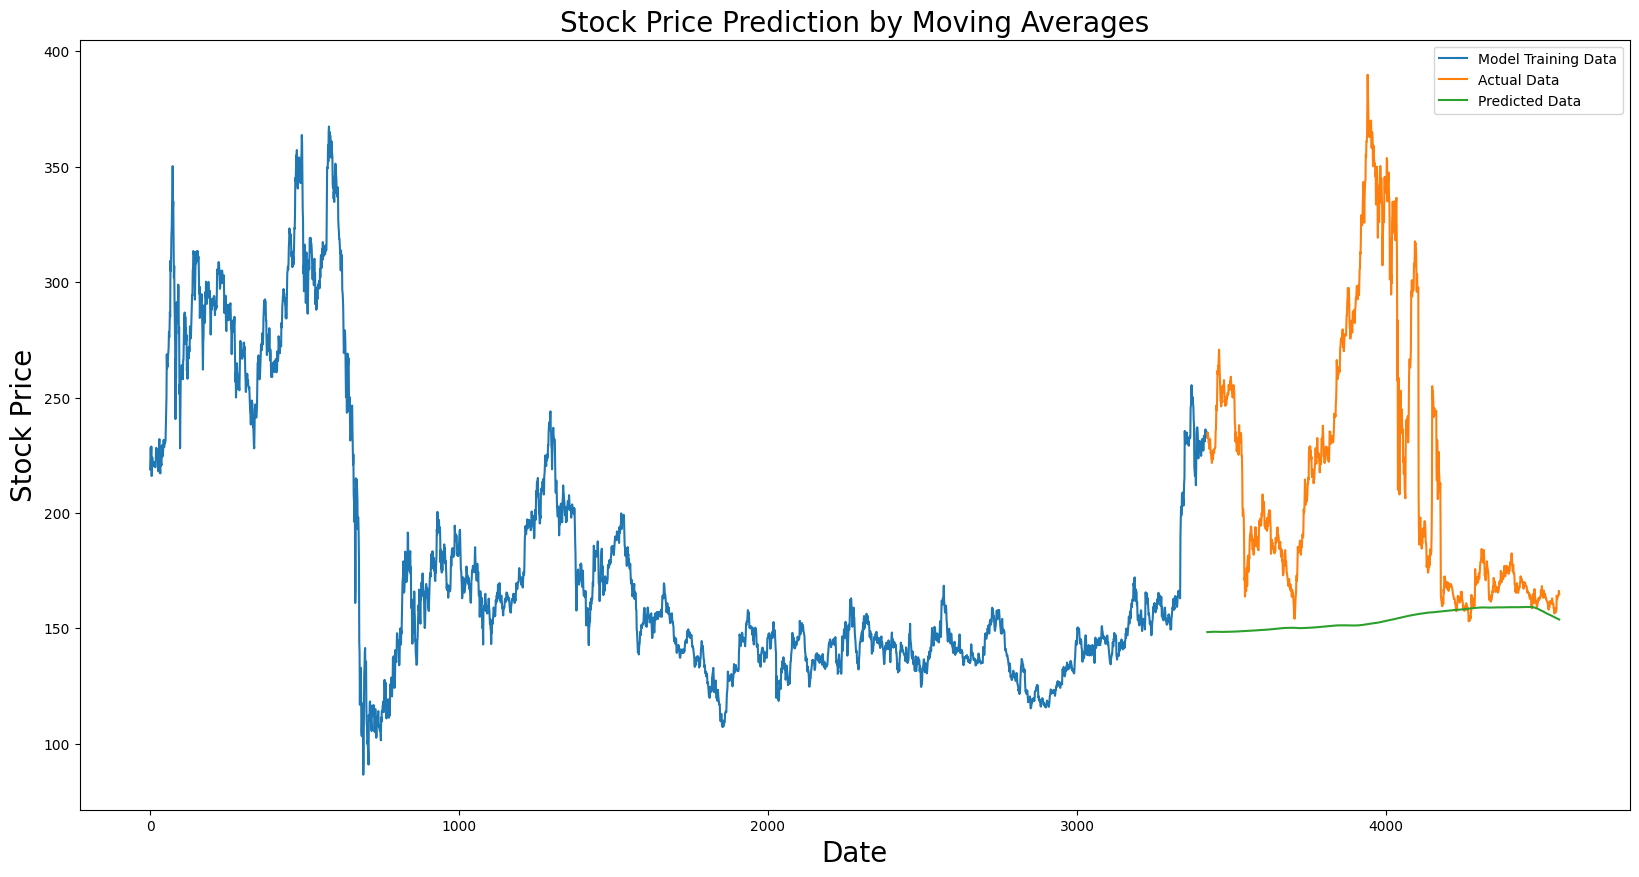

In [ ]:
moving_avg_prediction(df)

In [ ]:
df

,open,close,high,low,value,volume,end,date
time,,,,,,,,
01/23/2006 23:59:59,239.50,218.89,239.50,218.49,1.130995e+09,5120765,2006-01-23 23:59:59,2006-01-23
01/24/2006 23:59:59,221.00,224.00,224.68,219.66,1.991942e+09,8983192,2006-01-24 23:59:59,2006-01-24
01/25/2006 23:59:59,225.50,228.38,231.00,225.00,3.534137e+09,15480374,2006-01-25 23:59:59,2006-01-25
01/26/2006 23:59:59,228.20,224.47,229.41,223.51,1.721376e+09,7588759,2006-01-26 23:59:59,2006-01-26
01/27/2006 23:59:59,225.75,228.75,231.50,224.00,2.901323e+09,12729718,2006-01-27 23:59:59,2006-01-27
...,...,...,...,...,...,...,...,...
04/08/2024 23:59:59,164.00,163.89,164.90,163.57,2.709310e+09,16501080,2024-04-08 23:59:59,2024-04-08
04/09/2024 23:59:59,164.00,164.08,165.79,163.49,4.787296e+09,29074240,2024-04-09 23:59:59,2024-04-09
04/10/2024 23:59:59,164.10,164.74,165.94,163.59,3.831243e+09,23220690,2024-04-10 23:59:59,2024-04-10


In [ ]:
from datetime import datetime

# Предполагая, что df - ваш исходный DataFrame
df['time'] = df['end'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%m/%d/%Y %H:%M:%S'))
df.index = df['time']


In [ ]:
df

,open,close,high,low,value,volume,end,date,time
time,,,,,,,,,
01/23/2006 23:59:59,239.50,218.89,239.50,218.49,1.130995e+09,5120765,2006-01-23 23:59:59,2006-01-23,01/23/2006 23:59:59
01/24/2006 23:59:59,221.00,224.00,224.68,219.66,1.991942e+09,8983192,2006-01-24 23:59:59,2006-01-24,01/24/2006 23:59:59
01/25/2006 23:59:59,225.50,228.38,231.00,225.00,3.534137e+09,15480374,2006-01-25 23:59:59,2006-01-25,01/25/2006 23:59:59
01/26/2006 23:59:59,228.20,224.47,229.41,223.51,1.721376e+09,7588759,2006-01-26 23:59:59,2006-01-26,01/26/2006 23:59:59
01/27/2006 23:59:59,225.75,228.75,231.50,224.00,2.901323e+09,12729718,2006-01-27 23:59:59,2006-01-27,01/27/2006 23:59:59
...,...,...,...,...,...,...,...,...,...
04/08/2024 23:59:59,164.00,163.89,164.90,163.57,2.709310e+09,16501080,2024-04-08 23:59:59,2024-04-08,04/08/2024 23:59:59
04/09/2024 23:59:59,164.00,164.08,165.79,163.49,4.787296e+09,29074240,2024-04-09 23:59:59,2024-04-09,04/09/2024 23:59:59
04/10/2024 23:59:59,164.10,164.74,165.94,163.59,3.831243e+09,23220690,2024-04-10 23:59:59,2024-04-10,04/10/2024 23:59:59


-----------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY LINEAR REGRESSION-----------
-----------------------------------------------------------------
Shape of Training Set (3422, 1)
Shape of Validation Set (1140, 1)
Root Mean Squared Error (RMSE) on validation set: 137.92865526925218
Mean Squared Error (MSE) on validation set: 18519.32063573189
Mean Absolute Error (MAE) on validation set: 124.63657105470162
Mean Absolute Percentage Error (MAPE) on validation set: 55.55988071316901
R-squared (R^2) score on validation set: -4.564982548310033
-----------------------------------------------------------
-----------------------------------------------------------


<ipython-input-31-d9d622a9eef7>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_set['Predictions'] = preds


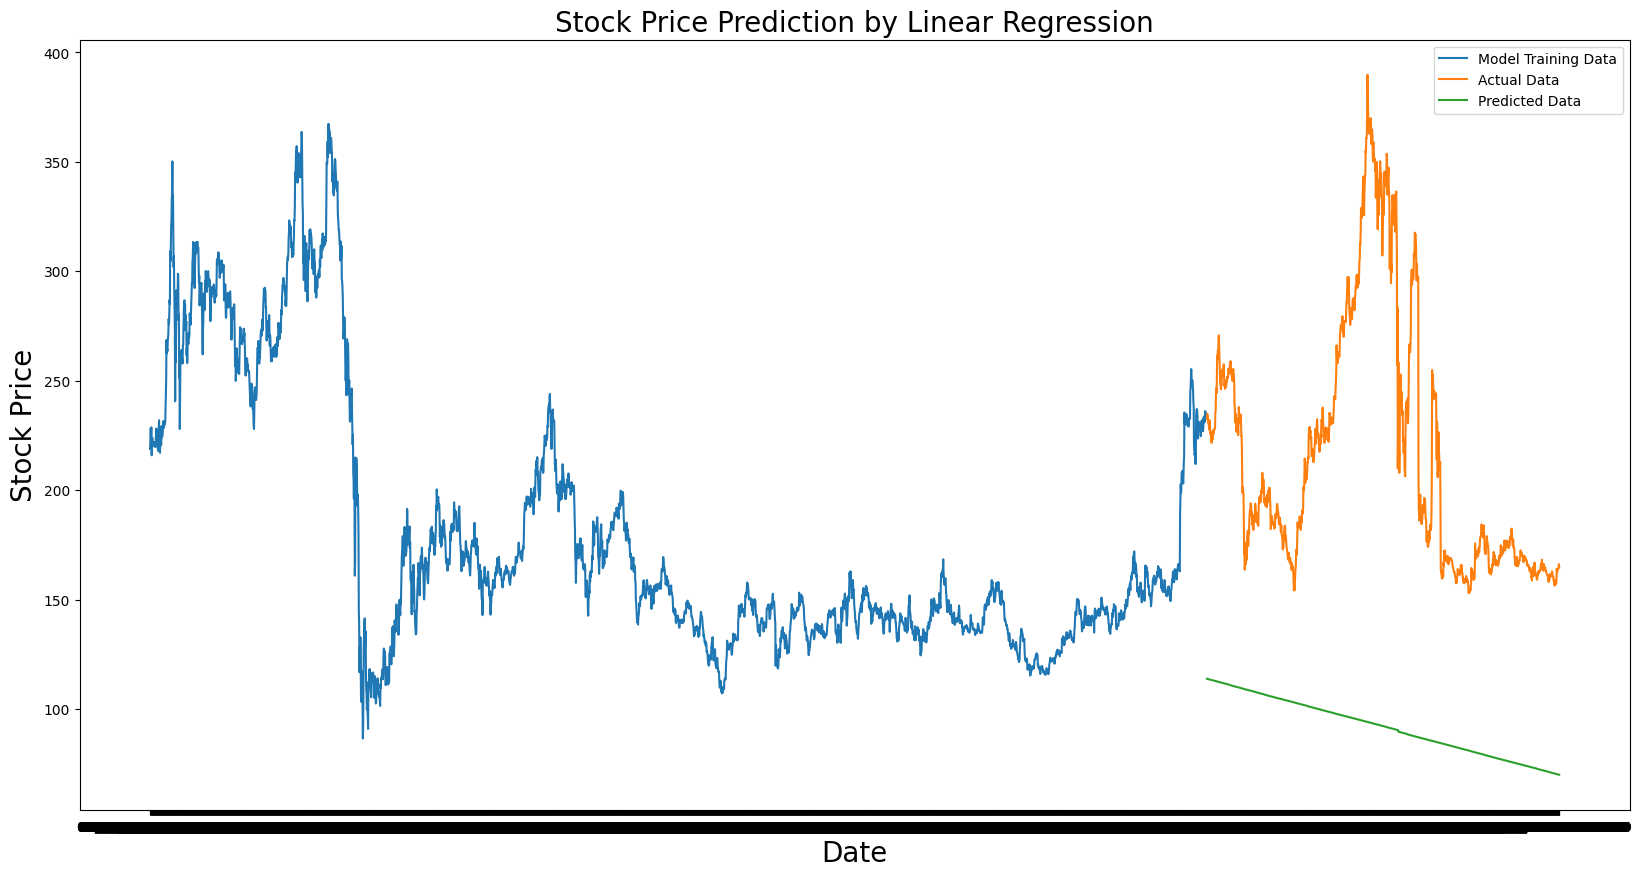

In [ ]:
import pandas as pd
from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def linear_regression_prediction(df):
    shape = df.shape[0]
    df_new = df[['close']]
    df_new.head()
    train_set = df_new.iloc[:ceil(shape*0.75)]
    valid_set = df_new.iloc[ceil(shape*0.75):]
    print('-----------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY LINEAR REGRESSION-----------')
    print('-----------------------------------------------------------------')
    print('Shape of Training Set', train_set.shape)
    print('Shape of Validation Set', valid_set.shape)
    train = train_set.reset_index()
    valid = valid_set.reset_index()
    x_train = train['time'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M:%S').toordinal())
    y_train = train[['close']]
    x_valid = valid['time'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M:%S').toordinal())
    y_valid = valid[['close']]

    model = LinearRegression()
    model.fit(np.array(x_train).reshape(-1, 1), y_train)
    preds = model.predict(np.array(x_valid).reshape(-1, 1))

    rms = np.sqrt(np.mean(np.power((np.array(valid_set['close']) - preds), 2)))
    print('Root Mean Squared Error (RMSE) on validation set:', rms)

    mse = mean_squared_error(y_valid, preds)
    print('Mean Squared Error (MSE) on validation set:', mse)

    mae = mean_absolute_error(y_valid, preds)
    print('Mean Absolute Error (MAE) on validation set:', mae)

    mape = np.mean(np.abs((y_valid - preds) / y_valid)) * 100
    print('Mean Absolute Percentage Error (MAPE) on validation set:', mape)

    r2 = r2_score(y_valid, preds)
    print('R-squared (R^2) score on validation set:', r2)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['close'])
    plt.plot(valid_set[['close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Linear Regression', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])

linear_regression_prediction(df)

In [ ]:
df

,open,close,high,low,value,volume,end,date,time
time,,,,,,,,,
01/23/2006 23:59:59,239.50,218.89,239.50,218.49,1.130995e+09,5120765,2006-01-23 23:59:59,2006-01-23,01/23/2006 23:59:59
01/24/2006 23:59:59,221.00,224.00,224.68,219.66,1.991942e+09,8983192,2006-01-24 23:59:59,2006-01-24,01/24/2006 23:59:59
01/25/2006 23:59:59,225.50,228.38,231.00,225.00,3.534137e+09,15480374,2006-01-25 23:59:59,2006-01-25,01/25/2006 23:59:59
01/26/2006 23:59:59,228.20,224.47,229.41,223.51,1.721376e+09,7588759,2006-01-26 23:59:59,2006-01-26,01/26/2006 23:59:59
01/27/2006 23:59:59,225.75,228.75,231.50,224.00,2.901323e+09,12729718,2006-01-27 23:59:59,2006-01-27,01/27/2006 23:59:59
...,...,...,...,...,...,...,...,...,...
04/08/2024 23:59:59,164.00,163.89,164.90,163.57,2.709310e+09,16501080,2024-04-08 23:59:59,2024-04-08,04/08/2024 23:59:59
04/09/2024 23:59:59,164.00,164.08,165.79,163.49,4.787296e+09,29074240,2024-04-09 23:59:59,2024-04-09,04/09/2024 23:59:59
04/10/2024 23:59:59,164.10,164.74,165.94,163.59,3.831243e+09,23220690,2024-04-10 23:59:59,2024-04-10,04/10/2024 23:59:59


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def k_nearest_neighbours_predict(df):
    shape = df.shape[0]
    df_new = df[['close']]
    df_new.head()
    train_set = df_new.iloc[:ceil(shape*0.75)]
    valid_set = df_new.iloc[ceil(shape*0.75):]
    print('-------------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS-----------')
    print('-------------------------------------------------------------------')
    print('Shape of Training Set', train_set.shape)
    print('Shape of Validation Set', valid_set.shape)
    train = train_set.reset_index()
    valid = valid_set.reset_index()
    train['time'] = pd.to_datetime(train['time'])
    valid['time'] = pd.to_datetime(valid['time'])
    x_train = train['time'].map(dt.datetime.toordinal)
    y_train = train[['close']]
    x_valid = valid['time'].map(dt.datetime.toordinal)
    y_valid = valid[['close']]
    x_train_scaled = scaler.fit_transform(np.array(x_train).reshape(-1, 1))
    x_train = pd.DataFrame(x_train_scaled)
    x_valid_scaled = scaler.fit_transform(np.array(x_valid).reshape(-1, 1))
    x_valid = pd.DataFrame(x_valid_scaled)
    params = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]}
    knn = neighbors.KNeighborsRegressor()
    model = GridSearchCV(knn, params, cv=5)
    model.fit(x_train, y_train)
    preds = model.predict(x_valid)
    # Расчет RMSE
    rmse = np.sqrt(mean_squared_error(y_valid, preds))
    print('Root Mean Squared Error (RMSE) on validation set:', rmse)
    # Расчет MSE
    mse = mean_squared_error(y_valid, preds)
    print('Mean Squared Error (MSE) on validation set:', mse)
    # Расчет MAE
    mae = mean_absolute_error(y_valid, preds)
    print('Mean Absolute Error (MAE) on validation set:', mae)
    # Расчет MAPE
    mape = np.mean(np.abs((y_valid - preds) / y_valid)) * 100
    print('Mean Absolute Percentage Error (MAPE) on validation set:', mape)
    # Расчет R^2
    r2 = r2_score(y_valid, preds)
    print('R-squared (R^2) score on validation set:', r2)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['close'])
    plt.plot(valid_set[['close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by K-Nearest Neighbors', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])


-------------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS-----------
-------------------------------------------------------------------
Shape of Training Set (3422, 1)
Shape of Validation Set (1140, 1)
Root Mean Squared Error (RMSE) on validation set: 87.04795432022101
Mean Squared Error (MSE) on validation set: 7577.346351335283
Mean Absolute Error (MAE) on validation set: 67.48864619883041
Mean Absolute Percentage Error (MAPE) on validation set: 28.76116027662891
R-squared (R^2) score on validation set: -1.27696258610704
-----------------------------------------------------------
-----------------------------------------------------------


<ipython-input-33-c24b13e778a6>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_set['Predictions'] = preds


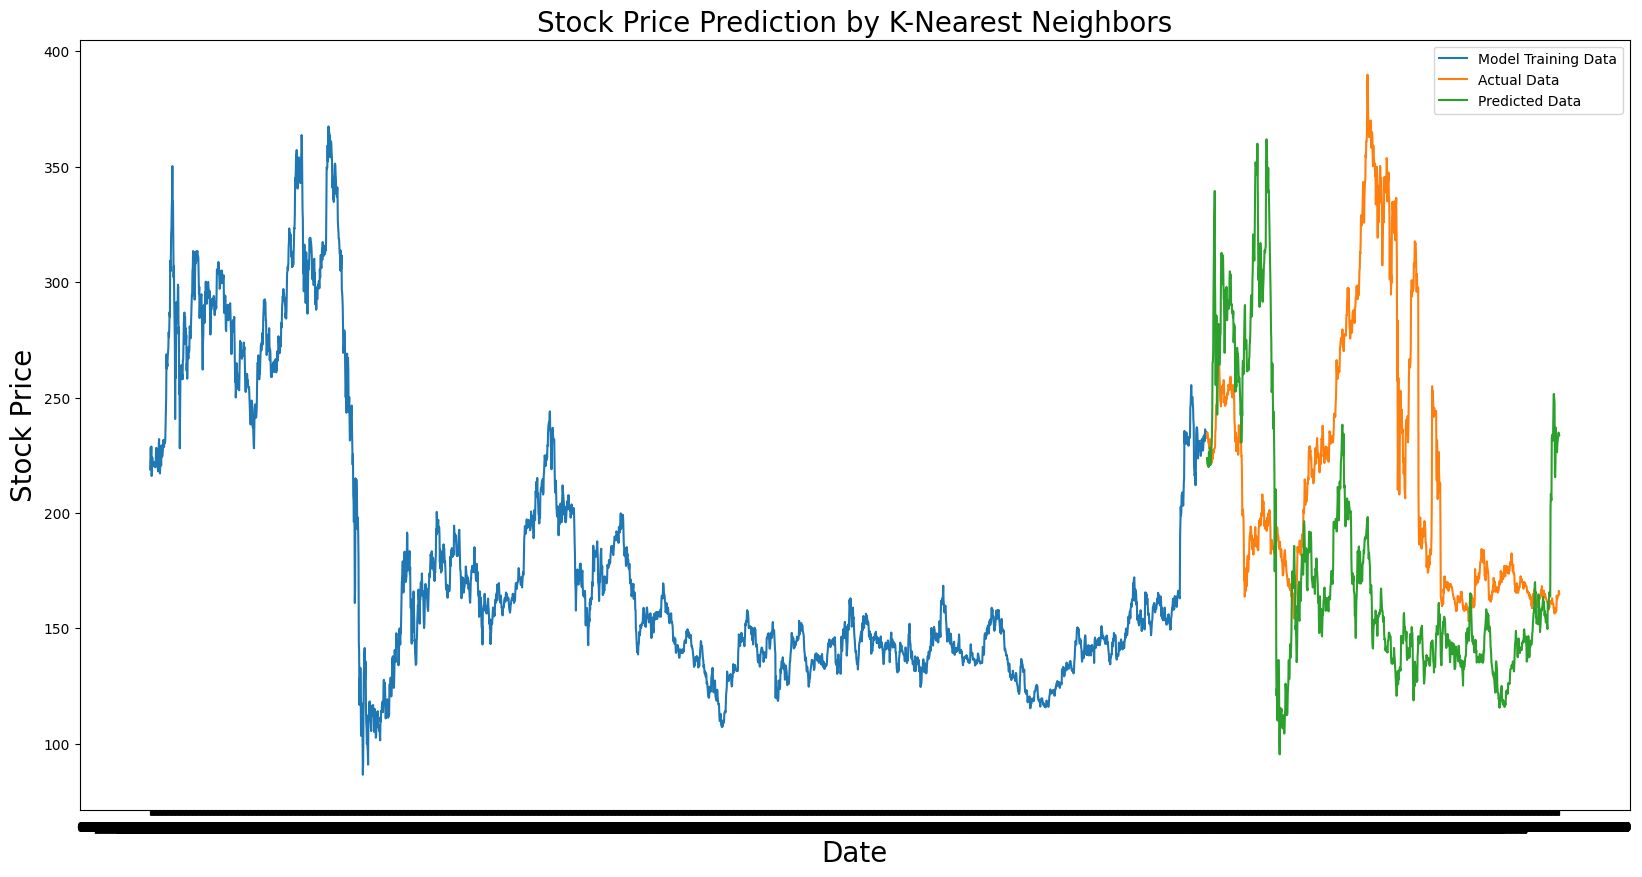

In [ ]:
k_nearest_neighbours_predict(df)

In [ ]:
def auto_arima_prediction(df):
    shape=df.shape[0]
    df_new=df
    data = df_new.sort_index(ascending=True, axis=0)
    train_set=data[:ceil(shape*0.75)]
    valid_set=data[ceil(shape*0.75):]
    print('----------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY AUTO ARIMA-----------')
    print('----------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    training = train_set['close']
    validation = valid_set['close']
    model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
    model.fit(training)
    forecast = model.predict(n_periods=ceil(floor(df.shape[0]*0.25)))
    forecast = pd.DataFrame(forecast,index = valid_set.index,columns=['Prediction'])
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['close'])-np.array(forecast['Prediction'])),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    plt.plot(train_set['close'])
    plt.plot(valid_set['close'])
    #plt.plot(forecast['Prediction'])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Auto ARIMA',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

----------------------------------------------------------
-----------STOCK PRICE PREDICTION BY AUTO ARIMA-----------
----------------------------------------------------------
Shape of Training Set (3422, 9)
Shape of Validation Set (1140, 9)
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=7.24 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=40994.455, Time=0.29 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=39059.608, Time=2.68 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=6.27 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=40331.518, Time=1.27 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=38743.941, Time=5.07 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=20.87 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=8.60 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=39166.197, Time=2.28 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=38363.135, Time=7.95 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=38561.816, Tim

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE value on validation set: nan
-----------------------------------------------------------
-----------------------------------------------------------


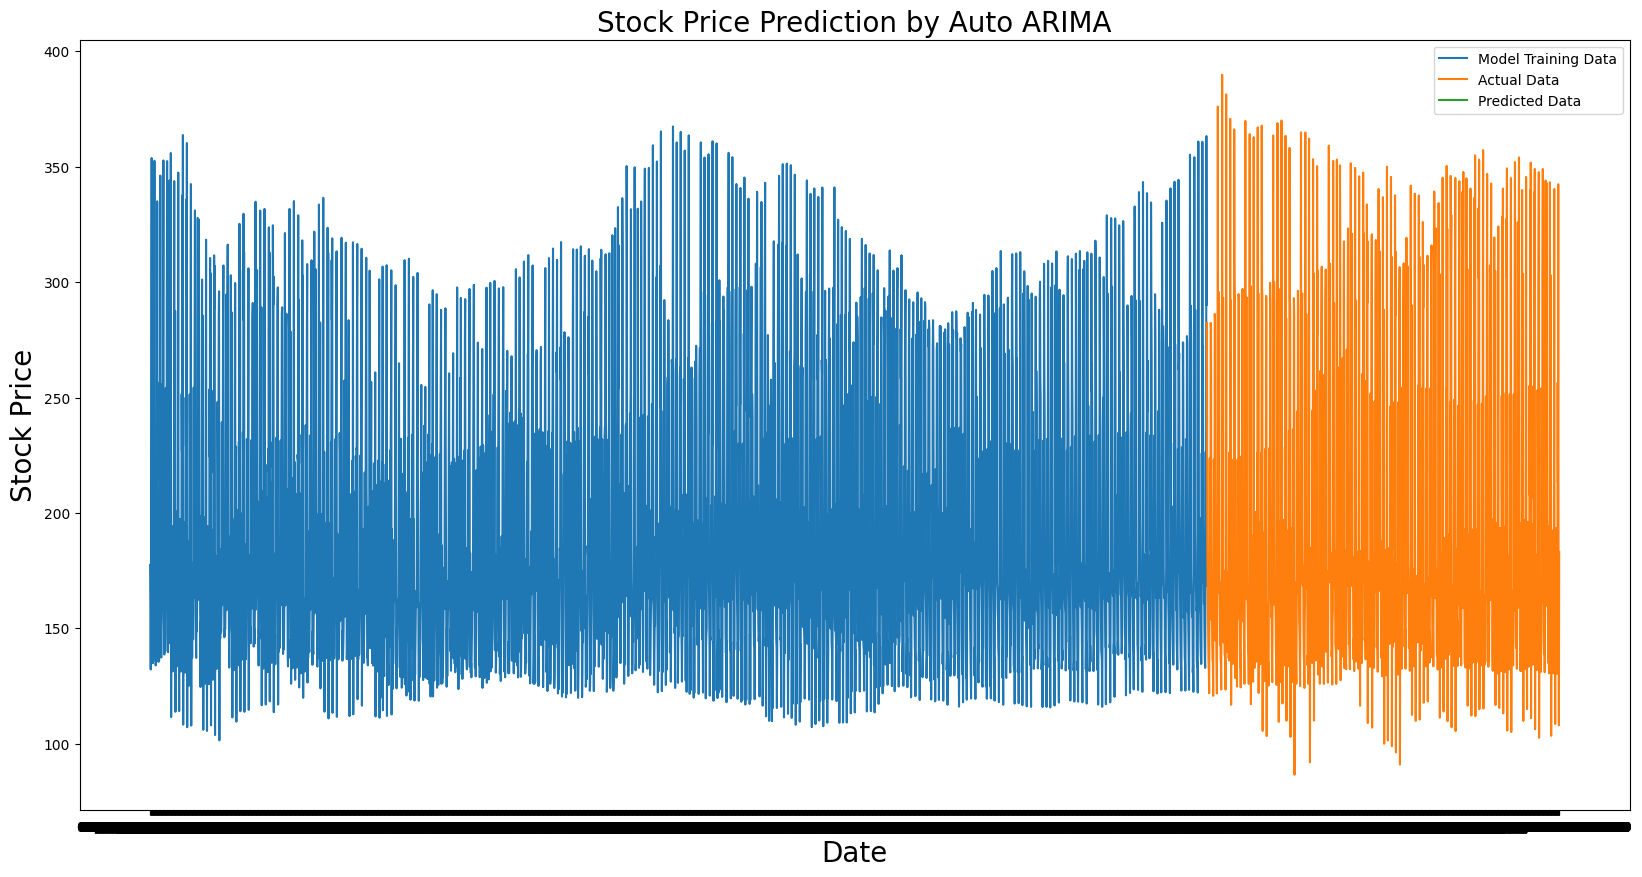

In [ ]:
auto_arima_prediction(df)

In [ ]:
df

,open,close,high,low,value,volume,end,date,time
time,,,,,,,,,
01/23/2006 23:59:59,239.50,218.89,239.50,218.49,1.130995e+09,5120765,2006-01-23 23:59:59,2006-01-23,2006-01-23 23:59:59
01/24/2006 23:59:59,221.00,224.00,224.68,219.66,1.991942e+09,8983192,2006-01-24 23:59:59,2006-01-24,2006-01-24 23:59:59
01/25/2006 23:59:59,225.50,228.38,231.00,225.00,3.534137e+09,15480374,2006-01-25 23:59:59,2006-01-25,2006-01-25 23:59:59
01/26/2006 23:59:59,228.20,224.47,229.41,223.51,1.721376e+09,7588759,2006-01-26 23:59:59,2006-01-26,2006-01-26 23:59:59
01/27/2006 23:59:59,225.75,228.75,231.50,224.00,2.901323e+09,12729718,2006-01-27 23:59:59,2006-01-27,2006-01-27 23:59:59
...,...,...,...,...,...,...,...,...,...
04/08/2024 23:59:59,164.00,163.89,164.90,163.57,2.709310e+09,16501080,2024-04-08 23:59:59,2024-04-08,2024-04-08 23:59:59
04/09/2024 23:59:59,164.00,164.08,165.79,163.49,4.787296e+09,29074240,2024-04-09 23:59:59,2024-04-09,2024-04-09 23:59:59
04/10/2024 23:59:59,164.10,164.74,165.94,163.59,3.831243e+09,23220690,2024-04-10 23:59:59,2024-04-10,2024-04-10 23:59:59


In [ ]:
from sklearn.svm import SVR

def svr_prediction(df):
    shape = df.shape[0]
    df_new = df[['close']]
    df_new.head()
    train_set = df_new.iloc[:ceil(shape*0.75)]
    valid_set = df_new.iloc[ceil(shape*0.75):]
    print('-----------------------------------------------------------------')
    print('----------STOCK PRICE PREDICTION BY SUPPORT VECTOR REGRESSION----------')
    print('-----------------------------------------------------------------')
    print('Shape of Training Set', train_set.shape)
    print('Shape of Validation Set', valid_set.shape)
    train = train_set.reset_index()
    valid = valid_set.reset_index()

    train['time'] = pd.to_datetime(train['time'])
    valid['time'] = pd.to_datetime(valid['time'])

    x_train = train['time'].map(dt.datetime.toordinal)
    y_train = train[['close']]
    x_valid = valid['time'].map(dt.datetime.toordinal)
    y_valid = valid[['close']]

    # Implement Support Vector Regression
    svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
    svr.fit(np.array(x_train).reshape(-1, 1), y_train)
    preds = svr.predict(np.array(x_valid).reshape(-1, 1))
    rms = np.sqrt(np.mean(np.power((np.array(y_valid) - preds), 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['close'])
    plt.plot(valid_set[['close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Support Vector Regression', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error, r2_score

def svr_prediction(df):
    shape = df.shape[0]
    df_new = df[['close']]
    df_new.head()
    train_set = df_new.iloc[:ceil(shape*0.75)]
    valid_set = df_new.iloc[ceil(shape*0.75):]
    print('-----------------------------------------------------------------')
    print('----------STOCK PRICE PREDICTION BY SUPPORT VECTOR REGRESSION----------')
    print('-----------------------------------------------------------------')
    print('Shape of Training Set', train_set.shape)
    print('Shape of Validation Set', valid_set.shape)
    train = train_set.reset_index()
    valid = valid_set.reset_index()

    train['time'] = pd.to_datetime(train['time'])
    valid['time'] = pd.to_datetime(valid['time'])

    x_train = train['time'].map(dt.datetime.toordinal)
    y_train = train[['close']]
    x_valid = valid['time'].map(dt.datetime.toordinal)
    y_valid = valid[['close']]

    # Implement Support Vector Regression
    svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
    svr.fit(np.array(x_train).reshape(-1, 1), y_train)
    preds = svr.predict(np.array(x_valid).reshape(-1, 1))
    # Calculate evaluation metrics
    mse = mean_squared_error(y_valid, preds)
    mae = mean_absolute_error(y_valid, preds)
    mape = mean_absolute_percentage_error(y_valid, preds)
    r2 = r2_score(y_valid, preds)
    print('MSE:', mse)
    print('MAE:', mae)
    print('MAPE:', mape)
    print('R^2:', r2)
    rms = np.sqrt(mse)
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['close'])
    plt.plot(valid_set[['close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Support Vector Regression', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])


-----------------------------------------------------------------
----------STOCK PRICE PREDICTION BY SUPPORT VECTOR REGRESSION----------
-----------------------------------------------------------------
Shape of Training Set (3422, 1)
Shape of Validation Set (1140, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 4741.812453959077
MAE: 47.04613486101782
MAPE: 0.18010268111994981
R^2: -0.4248958734872388
RMSE value on validation set: 68.86081944007839
-----------------------------------------------------------
-----------------------------------------------------------


<ipython-input-54-6b20b8cecf39>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_set['Predictions'] = preds


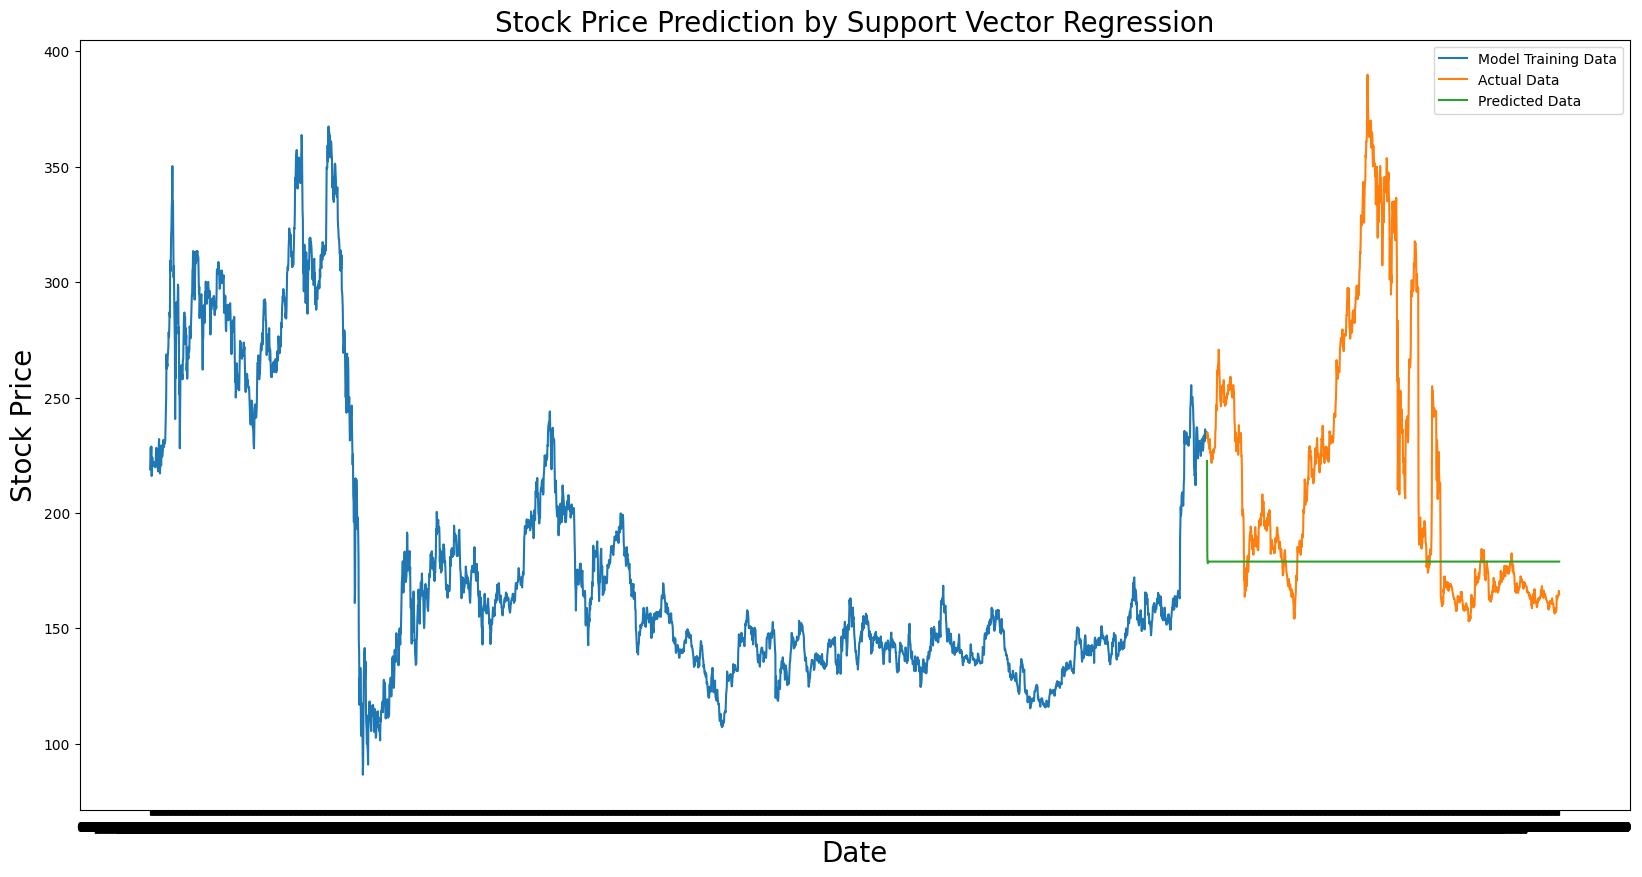

In [ ]:
svr_prediction(df)

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

def classic_rnn_prediction(df):
    shape = df.shape[0]
    df_new = df[['close']]
    df_new.head()
    train_set = df_new.iloc[:ceil(shape*0.75)]
    valid_set = df_new.iloc[ceil(shape*0.75):]
    print('-----------------------------------------------------------------')
    print('----------STOCK PRICE PREDICTION BY CLASSIC RECURRENT NEURAL NETWORK----------')
    print('-----------------------------------------------------------------')
    print('Shape of Training Set', train_set.shape)
    print('Shape of Validation Set', valid_set.shape)
    train = train_set.reset_index()
    valid = valid_set.reset_index()
    x_train = np.array(train['close'])
    x_valid = np.array(valid['close'])

    # Reshape data for RNN input
    x_train = np.reshape(x_train, (x_train.shape[0], 1, 1))
    x_valid = np.reshape(x_valid, (x_valid.shape[0], 1, 1))

    # Build classic RNN model
    model = Sequential()
    model.add(SimpleRNN(50, activation='relu', input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train RNN model
    model.fit(x_train, x_train, epochs=100, batch_size=1, verbose=0)

    # Make predictions
    preds = model.predict(x_valid)
    preds = preds.reshape(-1)

    # Calculate RMSE
    rms = np.sqrt(np.mean(np.power((np.array(valid_set['close']) - preds), 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['close'])
    plt.plot(valid_set[['close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Classic Recurrent Neural Network', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])


-----------------------------------------------------------------
----------STOCK PRICE PREDICTION BY CLASSIC RECURRENT NEURAL NETWORK----------
-----------------------------------------------------------------
Shape of Training Set (3422, 1)
Shape of Validation Set (1140, 1)
36/36 [==============================] - 0s 2ms/step
RMSE value on validation set: 0.010915208885894069
-----------------------------------------------------------
-----------------------------------------------------------


<ipython-input-60-e419707287cb>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_set['Predictions'] = preds


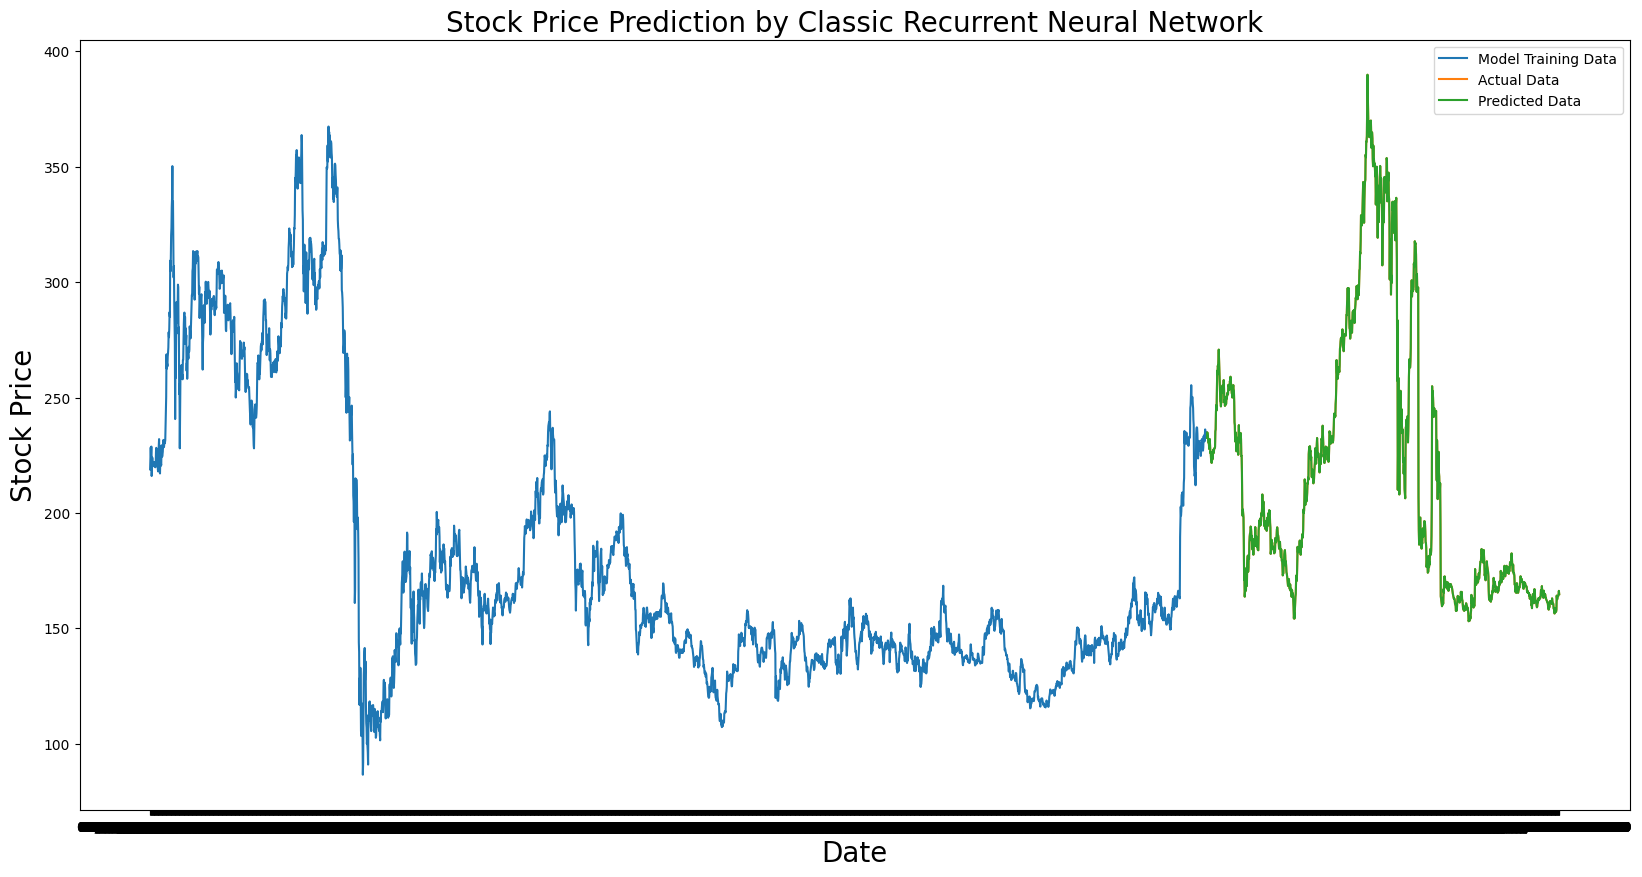

In [ ]:
classic_rnn_prediction(df)

-----------------------------------------------------------------
----------STOCK PRICE PREDICTION BY CLASSIC RECURRENT NEURAL NETWORK----------
-----------------------------------------------------------------
Shape of Training Set (3422, 1)
Shape of Validation Set (1140, 1)
36/36 [==============================] - 0s 2ms/step
RMSE value on validation set: 0.14427628633175843
-----------------------------------------------------------
-----------------------------------------------------------


<ipython-input-31-9fdf9f43de9d>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_set['Predictions'] = preds


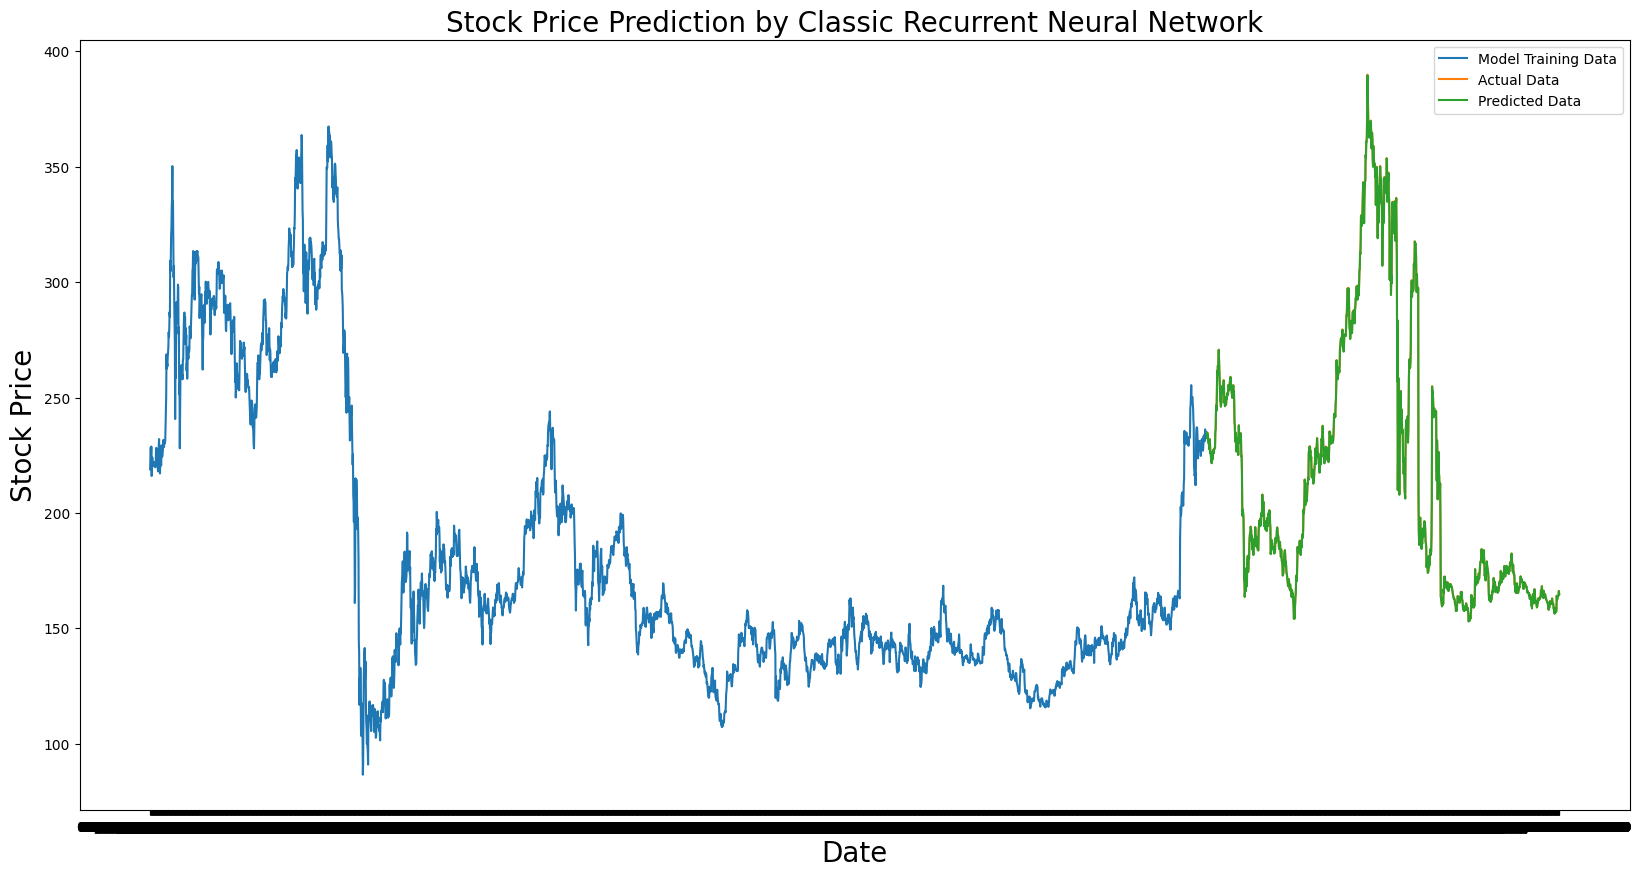

In [ ]:
classic_rnn_prediction(df)

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def classic_rnn_prediction(df):
    shape = df.shape[0]
    df_new = df[['close']]
    df_new.head()
    train_set = df_new.iloc[:ceil(shape*0.75)]
    valid_set = df_new.iloc[ceil(shape*0.75):]
    print('-----------------------------------------------------------------')
    print('----------STOCK PRICE PREDICTION BY CLASSIC RECURRENT NEURAL NETWORK----------')
    print('-----------------------------------------------------------------')
    print('Shape of Training Set', train_set.shape)
    print('Shape of Validation Set', valid_set.shape)
    train = train_set.reset_index()
    valid = valid_set.reset_index()
    x_train = np.array(train['close'])
    x_valid = np.array(valid['close'])

    # Reshape data for RNN input
    x_train = np.reshape(x_train, (x_train.shape[0], 1, 1))
    x_valid = np.reshape(x_valid, (x_valid.shape[0], 1, 1))

    # Build classic RNN model
    model = Sequential()
    model.add(SimpleRNN(50, activation='relu', input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    model.fit(x_train, x_train, epochs=100, batch_size=1, verbose=0)

    # Make predictions
    preds = model.predict(x_valid)
    preds = preds.reshape(-1)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(valid_set['close'], preds))
    print('RMSE value on validation set:', rmse)

    # Calculate MSE
    mse = mean_squared_error(valid_set['close'], preds)
    print('Mean Squared Error (MSE) on validation set:', mse)

    # Calculate MAE
    mae = mean_absolute_error(valid_set['close'], preds)
    print('Mean Absolute Error (MAE) on validation set:', mae)

    # Calculate MAPE
    mape = np.mean(np.abs((valid_set['close'] - preds) / valid_set['close'])) * 100
    print('Mean Absolute Percentage Error (MAPE) on validation set:', mape)

    # Calculate R^2
    r2 = r2_score(valid_set['close'], preds)
    print('R-squared (R^2) score on validation set:', r2)

    # Calculate accuracy (if applicable)
    # Not applicable for regression tasks

    # Calculate loss
    loss = model.evaluate(x_valid, np.array(valid_set['close']), verbose=0)
    print('Loss on validation set:', loss)

    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['close'])
    plt.plot(valid_set[['close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Classic Recurrent Neural Network', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def classic_rnn_prediction(df):
    shape = df.shape[0]
    df_new = df[['close']]
    df_new.head()
    train_set = df_new.iloc[:ceil(shape*0.75)]
    valid_set = df_new.iloc[ceil(shape*0.75):]
    print('-----------------------------------------------------------------')
    print('----------STOCK PRICE PREDICTION BY CLASSIC RECURRENT NEURAL NETWORK----------')
    print('-----------------------------------------------------------------')
    print('Shape of Training Set', train_set.shape)
    print('Shape of Validation Set', valid_set.shape)
    train = train_set.reset_index()
    valid = valid_set.reset_index()
    x_train = np.array(train['close'])
    x_valid = np.array(valid['close'])
    # Reshape data for RNN input
    x_train = np.reshape(x_train, (x_train.shape[0], 1, 1))
    x_valid = np.reshape(x_valid, (x_valid.shape[0], 1, 1))
    # Build classic RNN model
    model = Sequential()
    model.add(SimpleRNN(50, activation='relu', input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(x_train, x_train, epochs=2, batch_size=1, verbose=0)
    # Make predictions
    preds = model.predict(x_valid)
    preds = preds.reshape(-1)
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(valid_set['close'], preds))
    print('RMSE value on validation set:', rmse)
    # Calculate MSE
    mse = mean_squared_error(valid_set['close'], preds)
    print('Mean Squared Error (MSE) on validation set:', mse)
    # Calculate MAE
    mae = mean_absolute_error(valid_set['close'], preds)
    print('Mean Absolute Error (MAE) on validation set:', mae)
    # Calculate MAPE
    mape = np.mean(np.abs((valid_set['close'] - preds) / valid_set['close'])) * 100
    # Calculate R^2
    r2 = r2_score(valid_set['close'], preds)
    print('R-squared (R^2) score on validation set:', r2)
    loss = model.evaluate(x_valid, np.array(valid_set['close']), verbose=0)
    print('Loss on validation set:', loss)

    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['close'])
    plt.plot(valid_set[['close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Classic Recurrent Neural Network', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])

-----------------------------------------------------------------
----------STOCK PRICE PREDICTION BY CLASSIC RECURRENT NEURAL NETWORK----------
-----------------------------------------------------------------
Shape of Training Set (3422, 1)
Shape of Validation Set (1140, 1)
36/36 [==============================] - 0s 2ms/step
RMSE value on validation set: 0.078849445955153
Mean Squared Error (MSE) on validation set: 0.006217235127434595
Mean Absolute Error (MAE) on validation set: 0.06752142762301289
R-squared (R^2) score on validation set: 0.9999981317454532
Loss on validation set: 0.0062173521146178246
-----------------------------------------------------------
-----------------------------------------------------------


<ipython-input-66-190df2725f0d>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_set['Predictions'] = preds


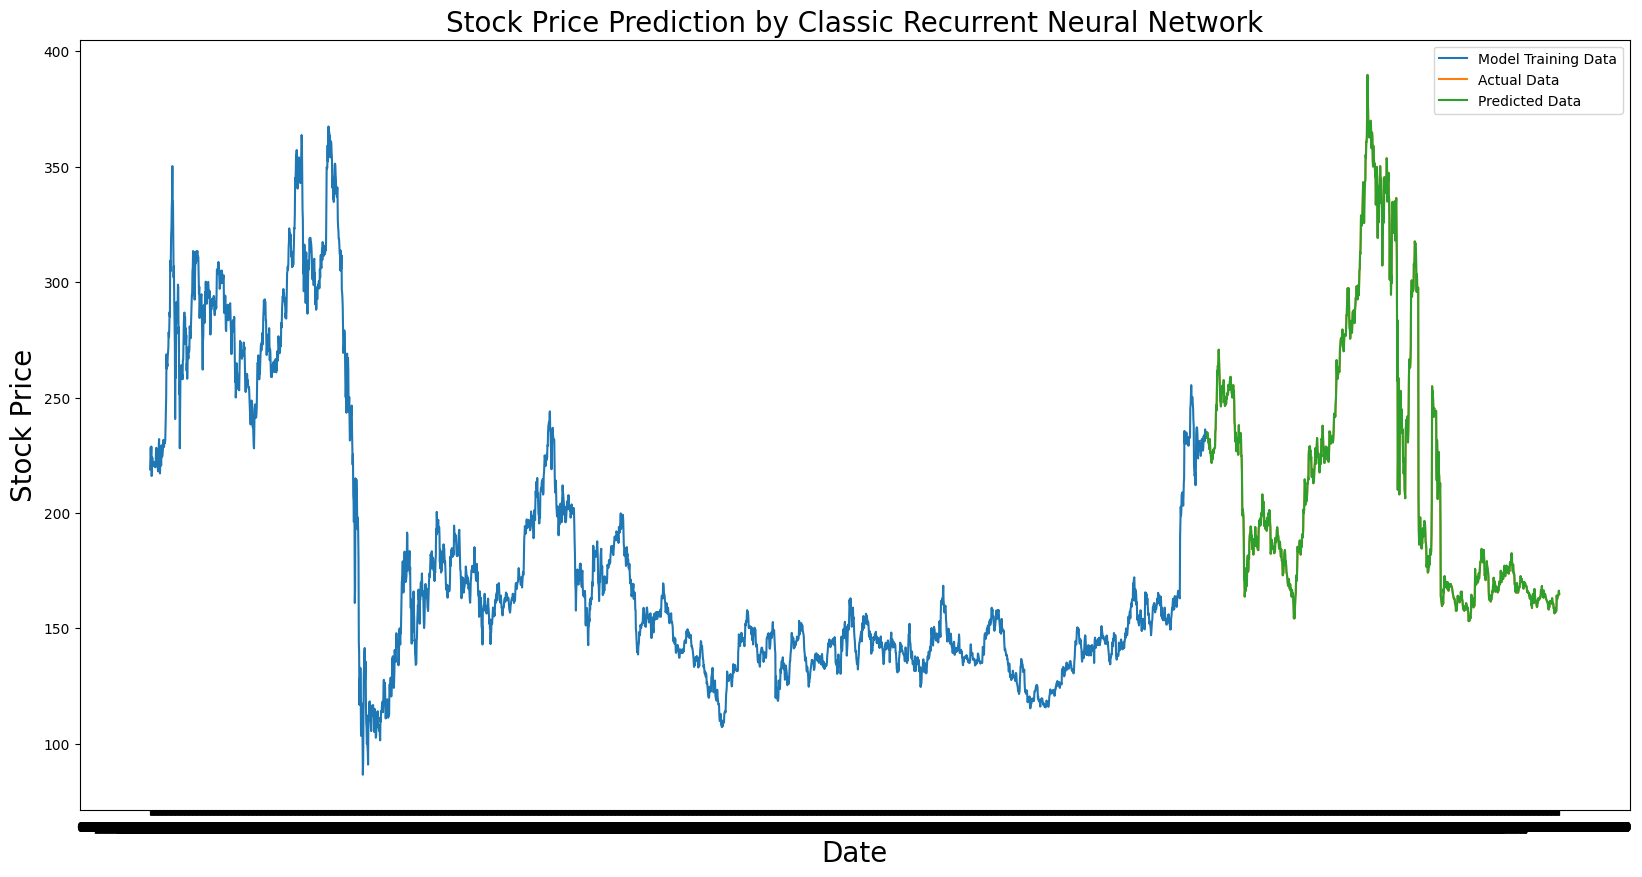

In [ ]:
classic_rnn_prediction(df)

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

def classic_rnn_prediction(df):
    shape = df.shape[0]
    df_new = df[['close']]
    df_new.head()
    train_set = df_new.iloc[:ceil(shape*0.75)]
    valid_set = df_new.iloc[ceil(shape*0.75):]
    print('-----------------------------------------------------------------')
    print('----------STOCK PRICE PREDICTION BY CLASSIC RECURRENT NEURAL NETWORK----------')
    print('-----------------------------------------------------------------')
    print('Shape of Training Set', train_set.shape)
    print('Shape of Validation Set', valid_set.shape)
    train = train_set.reset_index()
    valid = valid_set.reset_index()
    x_train = np.array(train['close'])
    x_valid = np.array(valid['close'])

    # Reshape data for RNN input
    x_train = np.reshape(x_train, (x_train.shape[0], 1, 1))
    x_valid = np.reshape(x_valid, (x_valid.shape[0], 1, 1))

    # Build classic RNN model
    model = Sequential()
    model.add(SimpleRNN(64, activation='relu', input_shape=(1, 1), return_sequences=True))
    model.add(SimpleRNN(32, activation='relu', return_sequences=True))
    model.add(SimpleRNN(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train RNN model
    model.fit(x_train, x_train, epochs=2, batch_size=1, verbose=0)

    # Make predictions
    preds = model.predict(x_valid)
    preds = preds.reshape(-1)

    # Calculate metrics
    mse = mean_squared_error(valid_set['close'], preds)
    mae = mean_absolute_error(valid_set['close'], preds)
    mape = mean_absolute_percentage_error(valid_set['close'], preds)
    r2 = r2_score(valid_set['close'], preds)

    print('MSE:', mse)
    print('MAE:', mae)
    print('MAPE:', mape)
    print('R^2:', r2)

    # Calculate RMSE
    rms = np.sqrt(np.mean(np.power((np.array(valid_set['close']) - preds), 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['close'])
    plt.plot(valid_set[['close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Classic Recurrent Neural Network', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])


-----------------------------------------------------------------
----------STOCK PRICE PREDICTION BY CLASSIC RECURRENT NEURAL NETWORK----------
-----------------------------------------------------------------
Shape of Training Set (3422, 1)
Shape of Validation Set (1140, 1)
36/36 [==============================] - 0s 2ms/step
MSE: 0.011008198354911024
MAE: 0.10467854978327092
MAPE: 0.0005057043254608261
R^2: 0.9999966920799668
RMSE value on validation set: 0.1049199616608347
-----------------------------------------------------------
-----------------------------------------------------------


<ipython-input-70-26840eb8559c>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_set['Predictions'] = preds


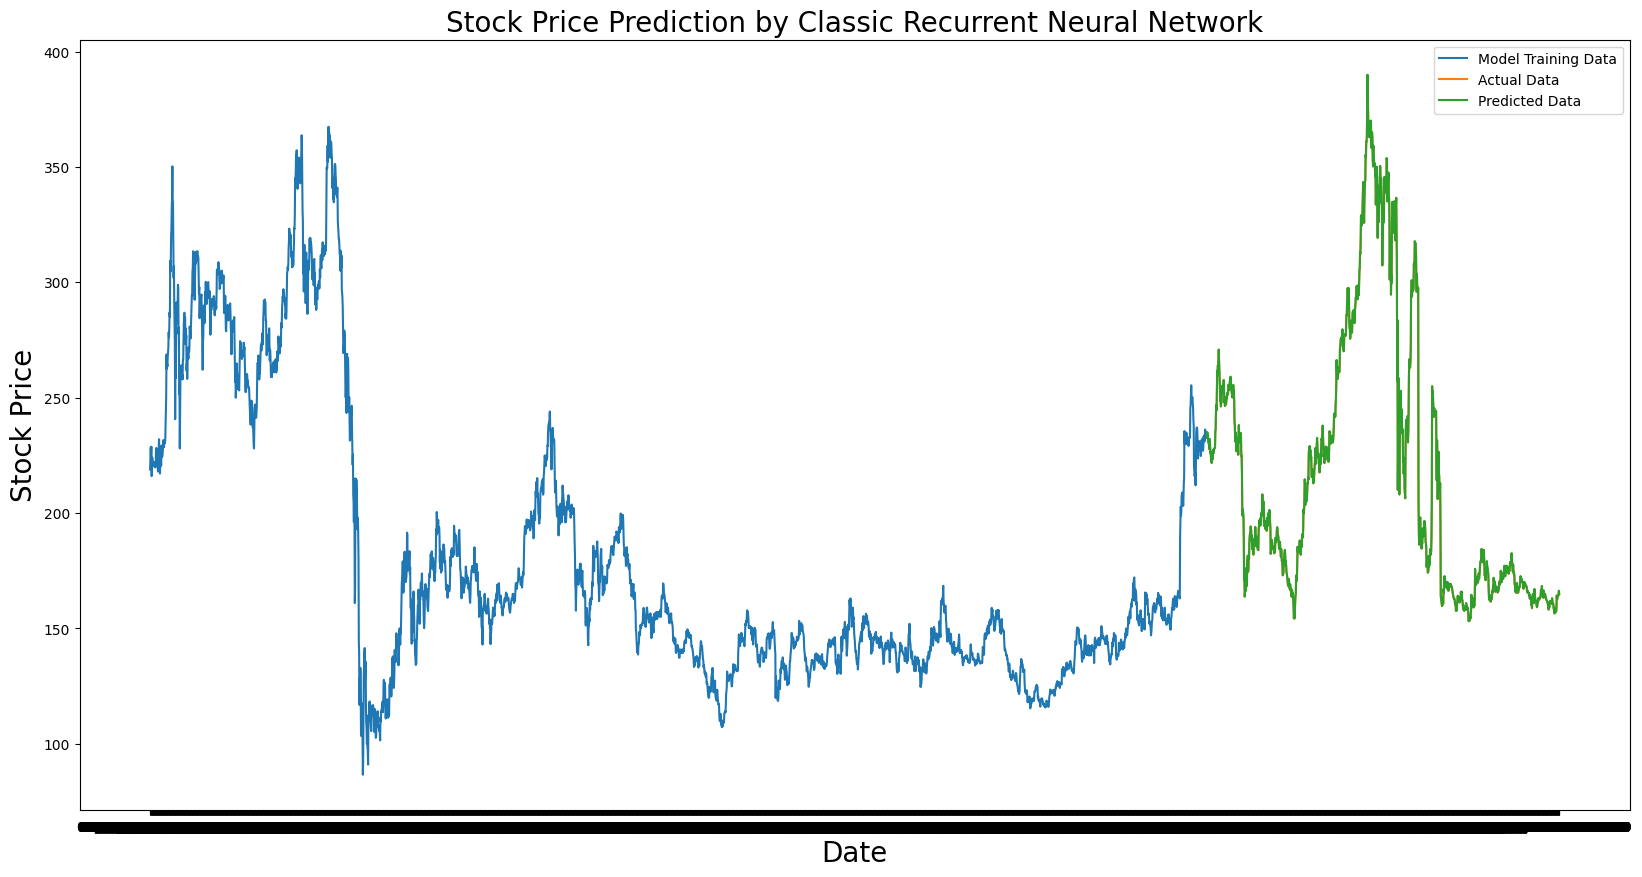

In [ ]:
classic_rnn_prediction(df)

-----------------------------------------------------------------
----------STOCK PRICE PREDICTION BY CONVOLUTIONAL NEURAL NETWORK----------
-----------------------------------------------------------------
Shape of Training Set (3422, 1)
Shape of Validation Set (1140, 1)
36/36 [==============================] - 0s 2ms/step
MSE: 0.0006972995411327382
MAE: 0.022210381223445097
MAPE: 9.355849334040065e-05
R^2: 0.9999997904642479
RMSE value on validation set: 0.026406429920243633
-----------------------------------------------------------
-----------------------------------------------------------


<ipython-input-75-ac8e3ae60063>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_set['Predictions'] = preds


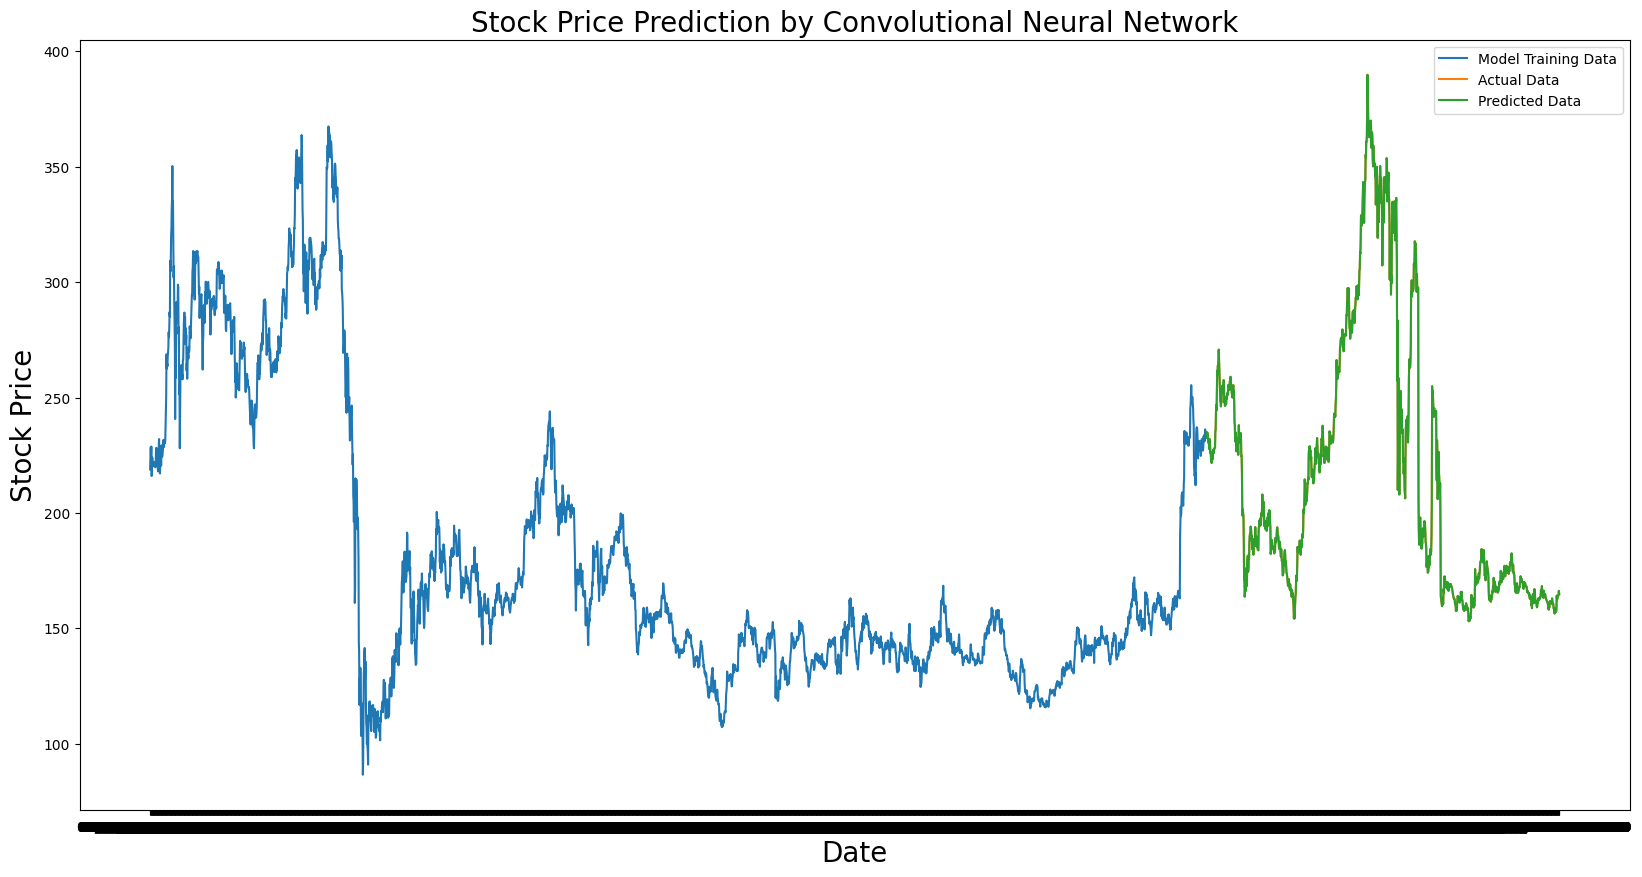

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

def cnn_prediction(df):
    shape = df.shape[0]
    df_new = df[['close']]
    df_new.head()
    train_set = df_new.iloc[:ceil(shape*0.75)]
    valid_set = df_new.iloc[ceil(shape*0.75):]
    print('-----------------------------------------------------------------')
    print('----------STOCK PRICE PREDICTION BY CONVOLUTIONAL NEURAL NETWORK----------')
    print('-----------------------------------------------------------------')
    print('Shape of Training Set', train_set.shape)
    print('Shape of Validation Set', valid_set.shape)
    train = train_set.reset_index()
    valid = valid_set.reset_index()
    x_train = np.array(train['close'])
    x_valid = np.array(valid['close'])
    x_train = np.reshape(x_train, (x_train.shape[0], 1, 1))
    x_valid = np.reshape(x_valid, (x_valid.shape[0], 1, 1))
    model = Sequential()
    model.add(Conv1D(64, 1, activation='relu', input_shape=(1, 1)))
    model.add(Conv1D(32, 1, activation='relu'))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    # Train CNN model
    model.fit(x_train, x_train, epochs=2, batch_size=1, verbose=0)
    # Make predictions
    preds = model.predict(x_valid)
    preds = preds.reshape(-1)
    mse = mean_squared_error(valid_set['close'], preds)
    mae = mean_absolute_error(valid_set['close'], preds)
    mape = mean_absolute_percentage_error(valid_set['close'], preds)
    r2 = r2_score(valid_set['close'], preds)
    print('MSE:', mse)
    print('MAE:', mae)
    print('MAPE:', mape)
    print('R^2:', r2)
    rms = np.sqrt(np.mean(np.power((np.array(valid_set['close']) - preds), 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['close'])
    plt.plot(valid_set[['close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Convolutional Neural Network', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])
cnn_prediction(df)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

def lstm_prediction(df):
    shape=df.shape[0]
    df_new=df[['close']]
    df_new.head()
    dataset = df_new.values
    train=df_new[:ceil(shape*0.75)]
    valid=df_new[ceil(shape*0.75):]
    print('-----------------------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------')
    print('-----------------------------------------------------------------------------')
    print('Shape of Training Set',train.shape)
    print('Shape of Validation Set',valid.shape)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    x_train, y_train = [], []
    for i in range(40,len(train)):
        x_train.append(scaled_data[i-40:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    X_test = []
    for i in range(40,inputs.shape[0]):
        X_test.append(inputs[i-40:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid['Predictions'] = closing_price
    plt.plot(train['close'])
    plt.plot(valid[['close','Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Long Short Term Memory (LSTM)',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

-----------------------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------
-----------------------------------------------------------------------------
Shape of Training Set (3422, 1)
Shape of Validation Set (1140, 1)
3382/3382 - 76s - loss: 0.0012 - 76s/epoch - 23ms/step
36/36 [==============================] - 1s 13ms/step
RMSE value on validation set: 8.235188675944949
-----------------------------------------------------------
-----------------------------------------------------------


<ipython-input-131-868ec9b9afb6>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


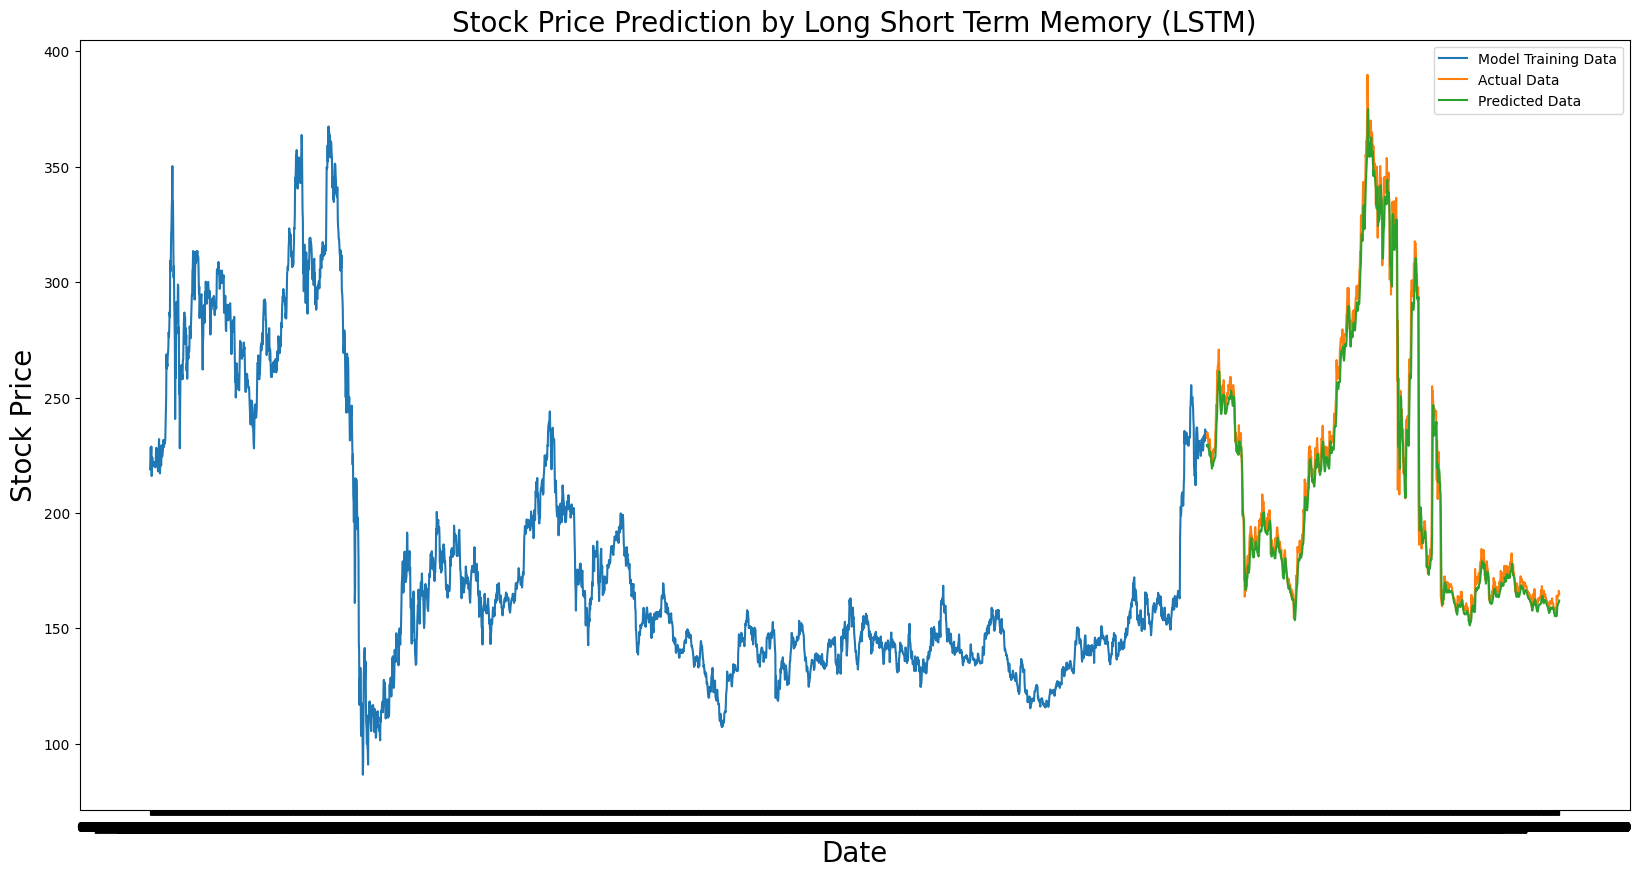

In [ ]:
lstm_prediction(df)

-----------------------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------
-----------------------------------------------------------------------------
Shape of Training Set (3422, 1)
Shape of Validation Set (1140, 1)
3382/3382 - 70s - loss: 0.0013 - 70s/epoch - 21ms/step
36/36 [==============================] - 1s 12ms/step
RMSE value on validation set: 7.656024526236968
Mean Squared Error (MSE) on validation set: 58.614712
Mean Absolute Error (MAE) on validation set: 4.104902
Mean Absolute Percentage Error (MAPE) on validation set: 1.83%
R-squared (R^2) score on validation set: 0.982387
-----------------------------------------------------------
-----------------------------------------------------------


<ipython-input-114-3f2b3df12e06>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


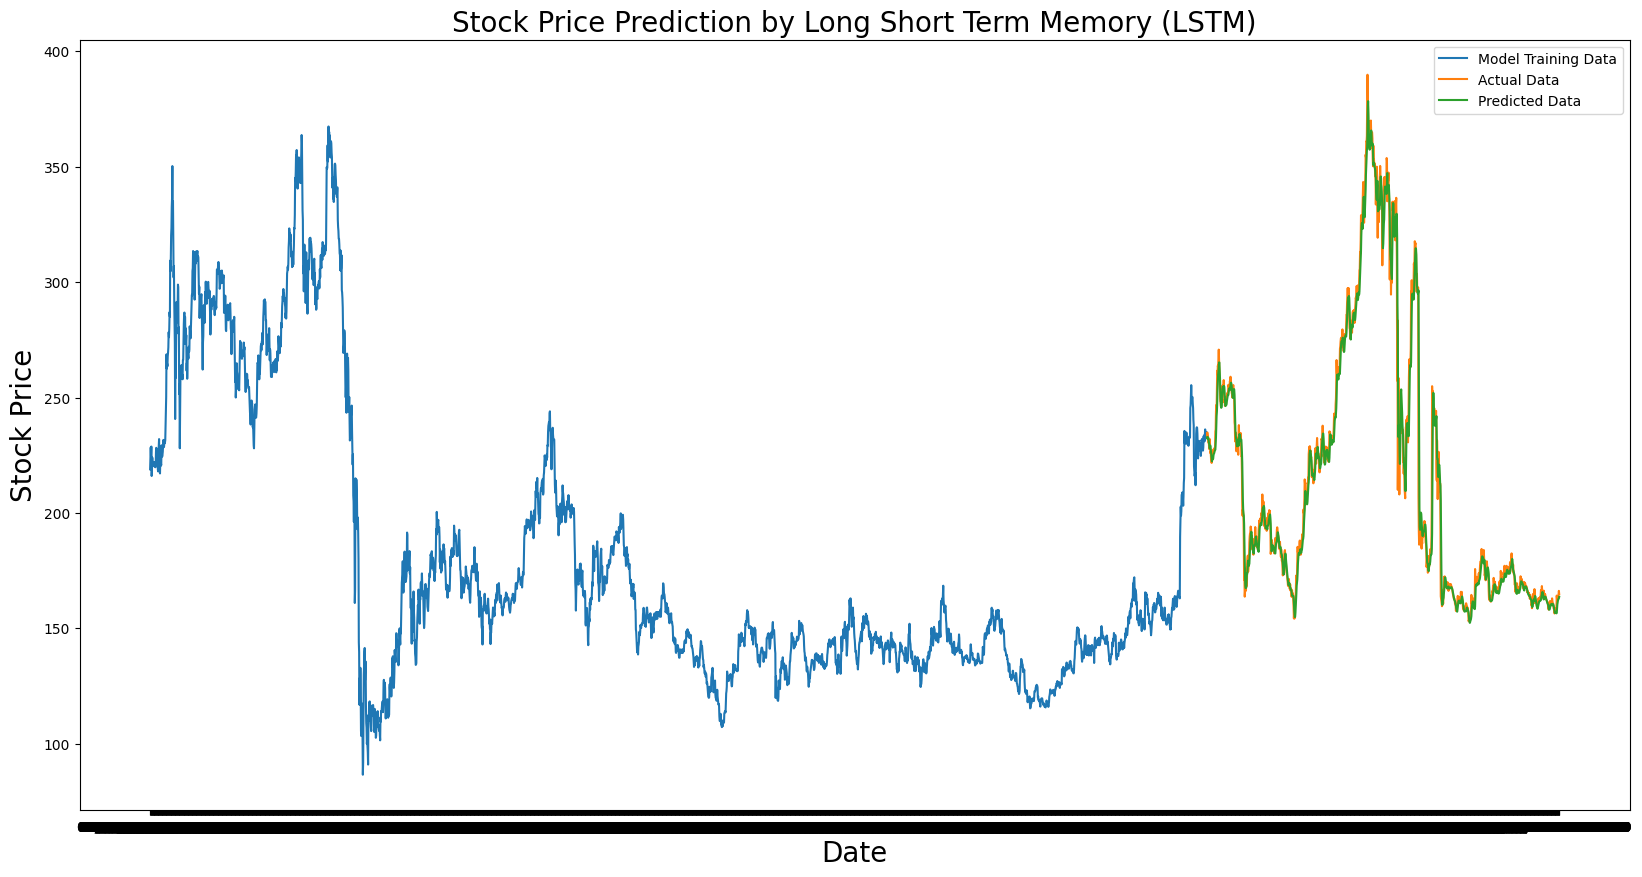

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def lstm_prediction(df):
    shape=df.shape[0]
    df_new=df[['close']]
    df_new.head()
    dataset = df_new.values
    train=df_new[:ceil(shape*0.75)]
    valid=df_new[ceil(shape*0.75):]
    print('-----------------------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------')
    print('-----------------------------------------------------------------------------')
    print('Shape of Training Set',train.shape)
    print('Shape of Validation Set',valid.shape)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    x_train, y_train = [], []
    for i in range(40,len(train)):
        x_train.append(scaled_data[i-40:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    X_test = []
    for i in range(40,inputs.shape[0]):
        X_test.append(inputs[i-40:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)

    # Calculate evaluation metrics
    y_true = valid.values
    y_pred = closing_price
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mse)

    print('RMSE value on validation set:', rmse)
    print(f'Mean Squared Error (MSE) on validation set: {mse:.6f}')
    print(f'Mean Absolute Error (MAE) on validation set: {mae:.6f}')
    print(f'Mean Absolute Percentage Error (MAPE) on validation set: {mape:.2f}%')
    print(f'R-squared (R^2) score on validation set: {r2:.6f}')
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid['Predictions'] = closing_price
    plt.plot(train['close'])
    plt.plot(valid[['close','Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Long Short Term Memory (LSTM)',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

lstm_prediction(df)

RMSE value on validation set: 0.90


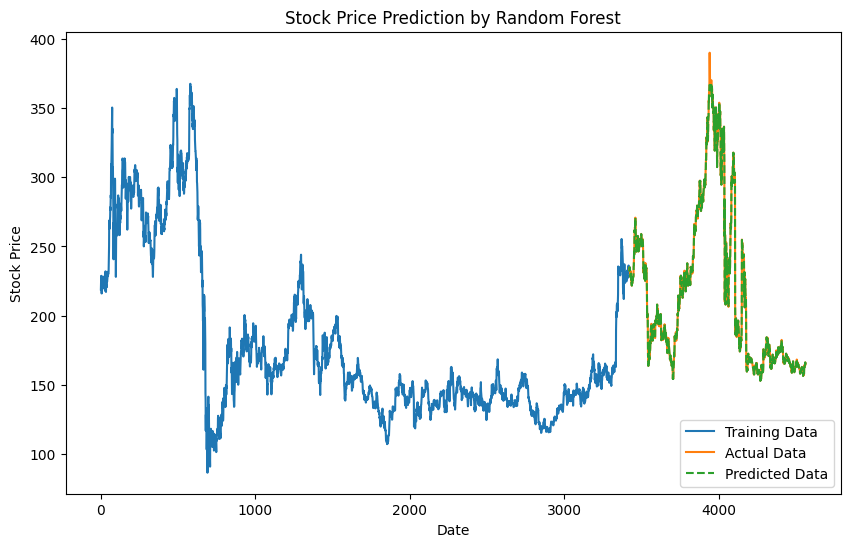

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def classic_random_forest_prediction(df):
    # Extract relevant features (e.g., 'close') for prediction
    features = ['close']
    target = 'close'

    # Split data into training and validation sets
    train_size = int(0.75 * len(df))
    train_df, valid_df = df.iloc[:train_size], df.iloc[train_size:]

    # Prepare input features and target
    X_train, y_train = train_df[features], train_df[target]
    X_valid, y_valid = valid_df[features], valid_df[target]

    # Initialize and train the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = rf_model.predict(X_valid)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(f"RMSE value on validation set: {rmse:.2f}")

    # Plot actual vs. predicted stock prices
    plt.figure(figsize=(10, 6))
    plt.plot(train_df.index, train_df['close'], label='Training Data')
    plt.plot(valid_df.index, valid_df['close'], label='Actual Data')
    plt.plot(valid_df.index, y_pred, label='Predicted Data', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title('Stock Price Prediction by Random Forest')
    plt.legend()
    plt.show()

# Assuming your DataFrame is named 'stock_data'
classic_random_forest_prediction(df)

RMSE value on validation set: 0.90
Mean Squared Error (MSE) on validation set: 0.804782
Mean Absolute Error (MAE) on validation set: 0.111541
Mean Absolute Percentage Error (MAPE) on validation set: 0.04%
R-squared (R^2) score on validation set: 0.999758


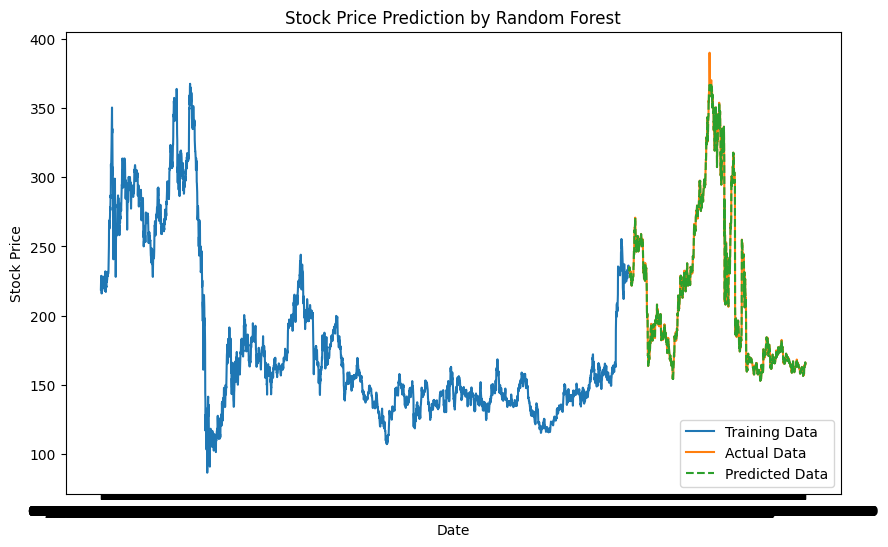

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def classic_random_forest_prediction(df):
    # Extract relevant features (e.g., 'close') for prediction
    features = ['close']
    target = 'close'

    # Split data into training and validation sets
    train_size = int(0.75 * len(df))
    train_df, valid_df = df.iloc[:train_size], df.iloc[train_size:]

    # Prepare input features and target
    X_train, y_train = train_df[features], train_df[target]
    X_valid, y_valid = valid_df[features], valid_df[target]

    # Initialize and train the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = rf_model.predict(X_valid)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_valid, y_pred)
    mae = mean_absolute_error(y_valid, y_pred)
    mape = np.mean(np.abs((y_valid - y_pred) / y_valid)) * 100  # Mean Absolute Percentage Error
    r2 = r2_score(y_valid, y_pred)
    rmse = np.sqrt(mse)

    # Print evaluation metrics
    print(f"RMSE value on validation set: {rmse:.2f}")
    print(f"Mean Squared Error (MSE) on validation set: {mse:.6f}")
    print(f"Mean Absolute Error (MAE) on validation set: {mae:.6f}")
    print(f"Mean Absolute Percentage Error (MAPE) on validation set: {mape:.2f}%")
    print(f"R-squared (R^2) score on validation set: {r2:.6f}")

    # Plot actual vs. predicted stock prices
    plt.figure(figsize=(10, 6))
    plt.plot(train_df.index, train_df['close'], label='Training Data')
    plt.plot(valid_df.index, valid_df['close'], label='Actual Data')
    plt.plot(valid_df.index, y_pred, label='Predicted Data', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title('Stock Price Prediction by Random Forest')
    plt.legend()
    plt.show()

# Assuming your DataFrame is named 'df'
classic_random_forest_prediction(df)


RMSE value on validation set (with offset): 29.96


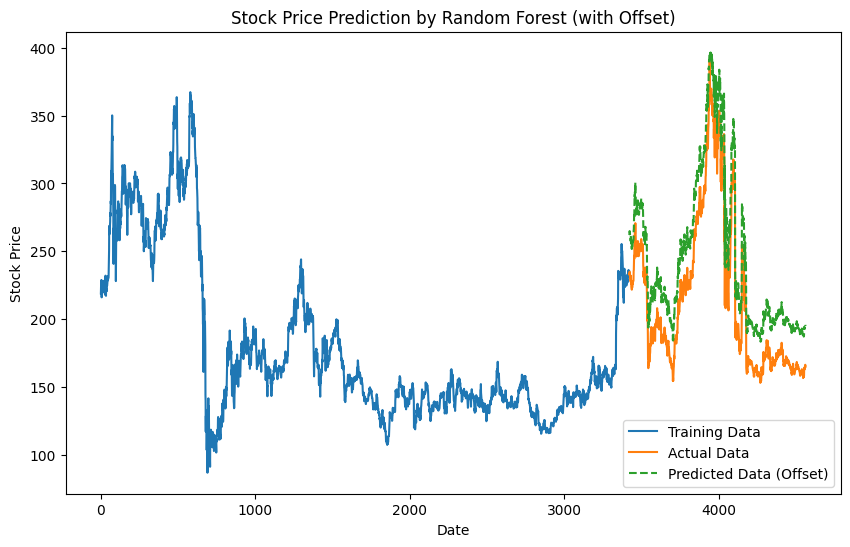

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def classic_random_forest_prediction(df):
    # Extract relevant features (e.g., 'close') for prediction
    features = ['close']
    target = 'close'

    # Split data into training and validation sets
    train_size = int(0.75 * len(df))
    train_df, valid_df = df.iloc[:train_size], df.iloc[train_size:]

    # Prepare input features and target
    X_train, y_train = train_df[features], train_df[target]
    X_valid, y_valid = valid_df[features], valid_df[target]

    # Initialize and train the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = rf_model.predict(X_valid)

    # Offset the predicted data along the y-axis (e.g., add 10 to the predicted values)
    y_pred_offset = y_pred + 30  # Adjust the offset value as needed

    # Calculate RMSE for the offset predictions
    rmse_offset = np.sqrt(mean_squared_error(y_valid, y_pred_offset))
    print(f"RMSE value on validation set (with offset): {rmse_offset:.2f}")

    # Plot actual vs. predicted stock prices (with offset)
    plt.figure(figsize=(10, 6))
    plt.plot(train_df.index, train_df['close'], label='Training Data')
    plt.plot(valid_df.index, valid_df['close'], label='Actual Data')
    plt.plot(valid_df.index, y_pred_offset, label='Predicted Data (Offset)', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title('Stock Price Prediction by Random Forest (with Offset)')
    plt.legend()
    plt.show()

# Assuming your DataFrame is named 'stock_data'
classic_random_forest_prediction(df)

RMSE value on validation set: 0.90
Mean Squared Error (MSE) on validation set: 0.80
Mean Absolute Error (MAE) on validation set: 0.11
Mean Absolute Percentage Error (MAPE) on validation set: 0.04%
R-squared (R^2) score on validation set: 1.00


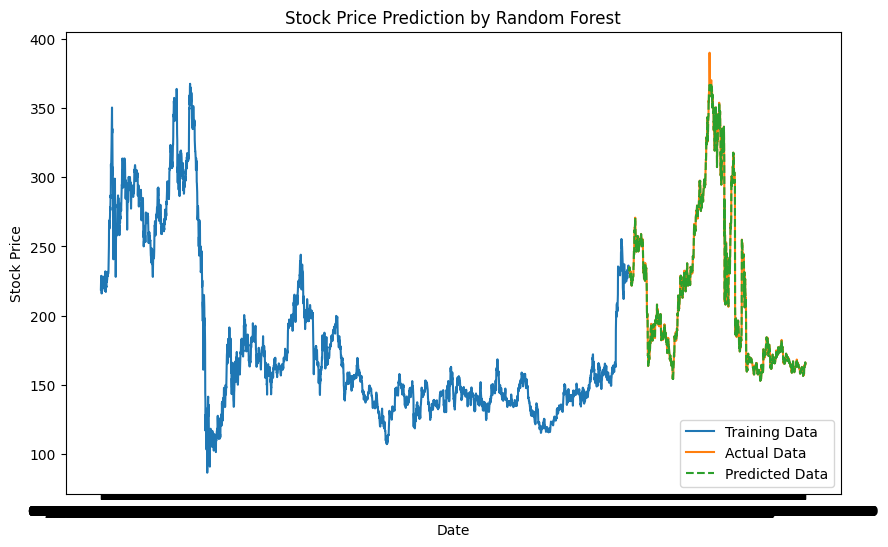

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def classic_random_forest_prediction(df):
    # Extract relevant features (e.g., 'close') for prediction
    features = ['close']
    target = 'close'

    # Split data into training and validation sets
    train_size = int(0.75 * len(df))
    train_df, valid_df = df.iloc[:train_size], df.iloc[train_size:]

    # Prepare input features and target
    X_train, y_train = train_df[features], train_df[target]
    X_valid, y_valid = valid_df[features], valid_df[target]

    # Initialize and train the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = rf_model.predict(X_valid)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(f"RMSE value on validation set: {rmse:.2f}")

    # Calculate MSE
    mse = mean_squared_error(y_valid, y_pred)
    print(f"Mean Squared Error (MSE) on validation set: {mse:.2f}")

    # Calculate MAE
    mae = mean_absolute_error(y_valid, y_pred)
    print(f"Mean Absolute Error (MAE) on validation set: {mae:.2f}")

    # Calculate MAPE
    mape = np.mean(np.abs((y_valid - y_pred) / y_valid)) * 100
    print(f"Mean Absolute Percentage Error (MAPE) on validation set: {mape:.2f}%")

    # Calculate R^2
    r2 = r2_score(y_valid, y_pred)
    print(f"R-squared (R^2) score on validation set: {r2:.2f}")

    # Plot actual vs. predicted stock prices
    plt.figure(figsize=(10, 6))
    plt.plot(train_df.index, train_df['close'], label='Training Data')
    plt.plot(valid_df.index, valid_df['close'], label='Actual Data')
    plt.plot(valid_df.index, y_pred, label='Predicted Data', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title('Stock Price Prediction by Random Forest')
    plt.legend()
    plt.show()

# Assuming your DataFrame is named 'stock_data'
classic_random_forest_prediction(df)


In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

regressor = Sequential()

# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
# Adding the Second Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
# Adding the Second Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))
# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])

In [ ]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 10, 10)            480       
                                                                 
 lstm_6 (LSTM)               (None, 10, 5)             320       
                                                                 
 lstm_7 (LSTM)               (None, 5)                 220       
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1026 (4.01 KB)
Trainable params: 1026 (4.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


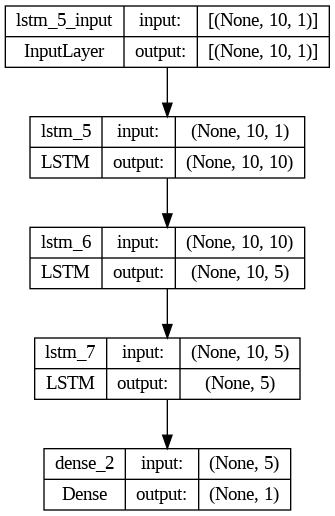

In [ ]:
tf.keras.utils.plot_model(regressor, "regressor.png", show_shapes=True)

In [ ]:

from keras.callbacks import EarlyStopping

callbacks = [
    EarlyStopping(monitor='val_loss', patience=2)
]

callbacks = [
    EarlyStopping(monitor='accuracy', patience=2)
]

#model.fit(x, y, epochs=epochs, batch_size=batch_size, callbacks=callbacks)



import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 4, callbacks=callbacks)

EndTime=time.time()
print("## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ##')

Epoch 1/4
683/683 [==============================] - 14s 15ms/step - loss: 0.0084 - accuracy: 2.9308e-04
Epoch 2/4
683/683 [==============================] - 10s 15ms/step - loss: 0.0012 - accuracy: 2.9308e-04
Epoch 3/4
683/683 [==============================] - 10s 15ms/step - loss: 0.0011 - accuracy: 2.9308e-04
## Total Time Taken:  1 Minutes ##


36/36 [==============================] - 0s 9ms/step
Accuracy: 96.14852172775346


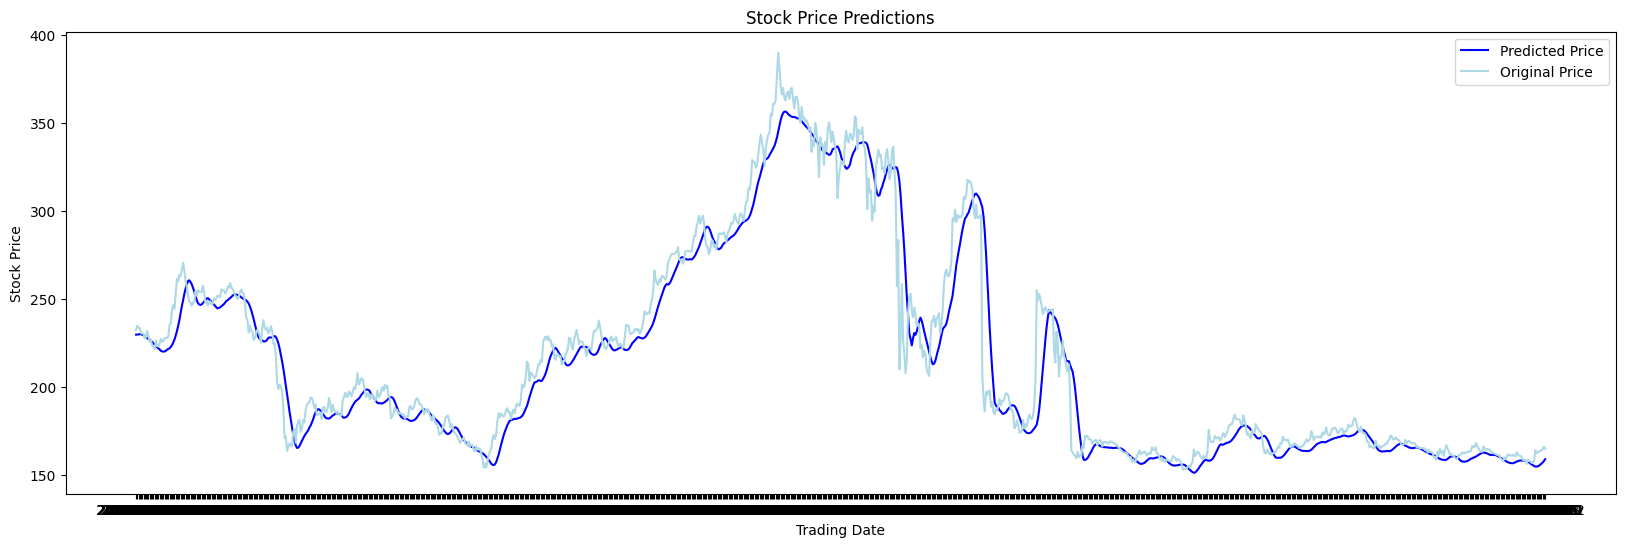

In [ ]:
# Making predictions on test data
predicted_Price = regressor.predict(X_test)
predicted_Price = dataScaler.inverse_transform(predicted_Price)

# Getting the original price values for testing data
orig=y_test
orig=dataScaler.inverse_transform(y_test)

# Accuracy of the predictions
print('Accuracy:', 100 - (100*(abs(orig - predicted_Price)/orig)).mean())

# Visualising the results
import matplotlib.pyplot as plt

plt.plot(predicted_Price, color = 'blue', label = 'Predicted Price')
plt.plot(orig, color = 'lightblue', label = 'Original Price')

plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(range(TestingRecords), df.tail(TestingRecords)['date'])
plt.ylabel('Stock Price')

plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

36/36 [==============================] - 0s 7ms/step


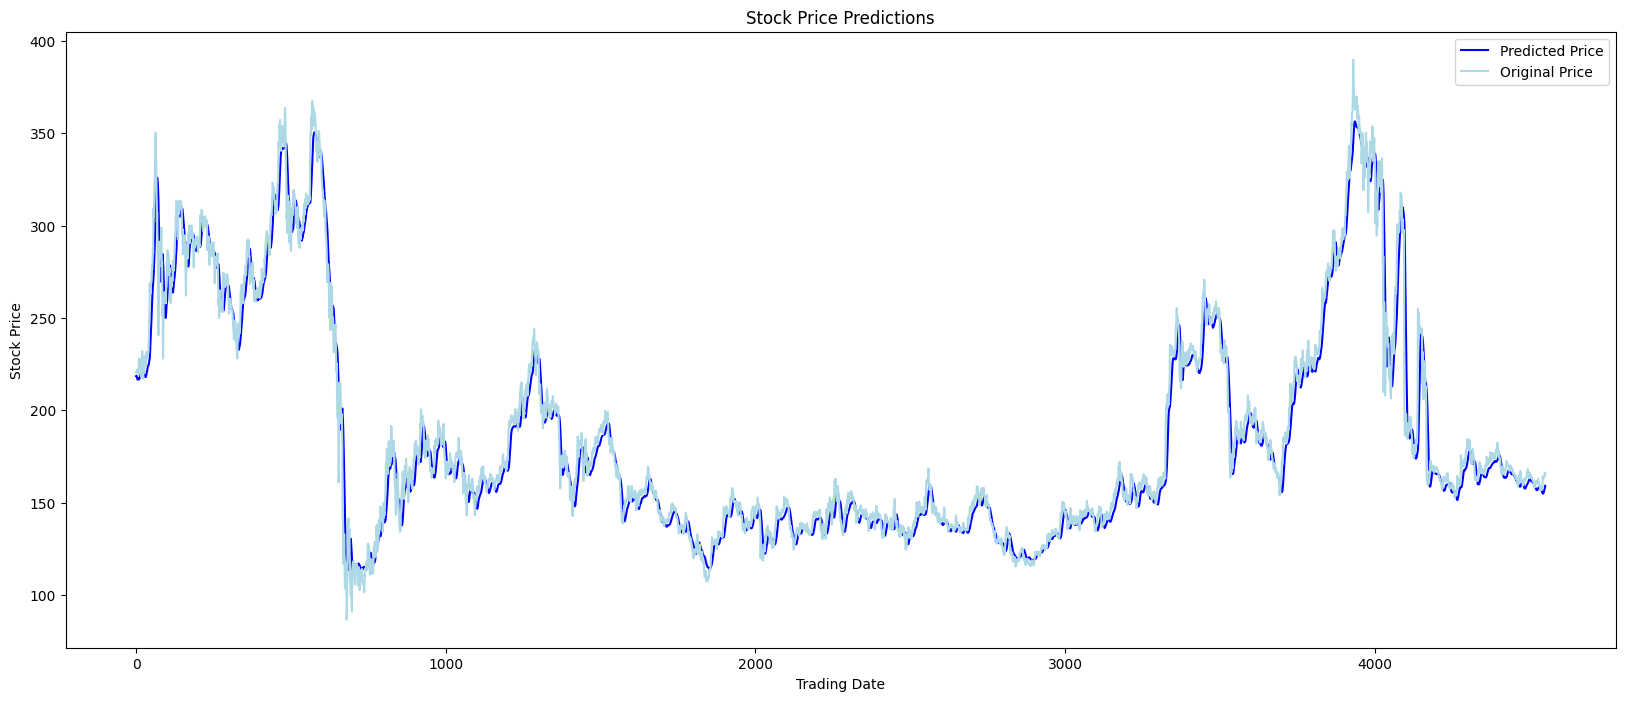

In [ ]:
# Generating predictions on full data
TrainPredictions=dataScaler.inverse_transform(regressor.predict(X_train))
TestPredictions=dataScaler.inverse_transform(regressor.predict(X_test))

FullDataPredictions=np.append(TrainPredictions, TestPredictions)
FullDataOrig=fullData[TimeSteps:]

# plotting the full data
plt.plot(FullDataPredictions, color = 'blue', label = 'Predicted Price')
plt.plot(FullDataOrig , color = 'lightblue', label = 'Original Price')


plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show()